# **Problem Statement**

---



The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.



In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.


**Data sourcing and sentiment analysis**
<br>
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products.





The steps to be performed are given below:

1. **Import necessary libraries and dataset**


2. **Data Cleaning and Pre-Processing**
<br>
* Perform Exploratory data analysis
* Understand the structure, distribution, and trends in the dataset.
* Visualize the data to derive insights


3. **Text preprocessing** <br>
* Explore relevant text preprocessing steps
* Provide reasons for each step in text preprocessing

4. **Feature extraction:** <br> In order to extract features from the text data, choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

5. **Model Building :** <br>
* Build at least 3 ML models (Logistic Regression, Random Forest, XGBoost, Naive Bayes)
* Perform comparative analysis of models
* Handle class imbalance and perform hyperparameter tuning if necessary
* Select the best model based on performance with detailed reasons

6. **Building a recommendation system** <br>
Build and evaluate:
* User-based recommendation system.
* Item-based recommendation system.
<br>
Select the best-suited recommendation approach.

7. **Recommendation of Top 20 Products to a Specified User** <br>
Recommend top 20 products for the username selected by the user based on the recommendation system built
<br>
8. **Fine-Tuning the Recommendation System and Recommendation of Top 5 Products** <br>
* Predict sentiment of reviews in train set of top 20 recommended products for a user
* Find percentage of positive sentiments for each product's reviews
* Filter top 5 products with highest percentage of positive reviews
9. **Deployment Using Flask** <br>
* Build an end-to-end web application using Flask and deploy it locally
* Include one ML model and one recommendation system in deployment
* Take username as input, create submit button, recommend 5 products based on entered username

# **1- Import necessary libraries**

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

# NLTK libraries:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import time

import pickle
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score , RocCurveDisplay
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score , roc_curve
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Loading the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path='/content/drive/My Drive/data/sample30.csv'

In [5]:
# Reading the input from folder
master_df = pd.read_csv(file_path)
df=master_df.copy()
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
24891,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-09-19T00:00:00.000Z,NaN,True,5,Great effects good story line this is a diffin...,great movie for the whole family,NaN,NaN,josh3110,Positive
13301,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-05T00:00:00.000Z,False,True,5,Works great on kitchen counters and toilet sea...,Wiping clean,NaN,NaN,busybee1995,Positive
5608,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,Red (special Edition) (dvdvideo),2015-07-01T00:00:00.000Z,NaN,True,3,Typical Bruce Willis movie. Lots of action wit...,Decent,NaN,NaN,nikim,Positive
16064,AVpf63aJLJeJML43F__Q,Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Li...",Burt's Bees,"Burt's Bees Lip Shimmer, Raisin",2009-09-08T00:00:00.000Z,False,True,5,I really loved using this lip shimmer. I loved...,The BEST,NaN,NaN,melis12,Positive
2248,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-11-16T00:00:00.000Z,NaN,True,5,If you're looking for a crude comedy look no f...,Laugh-Out-Loud good...,NaN,NaN,coachtill1,Negative


# **2- Data Cleaning and Pre-Processing**

In [6]:
pd.set_option('max_colwidth', 500)

In [7]:
df.shape

(30000, 15)

In [8]:
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [10]:
# Total reviews
total = len(df['reviews_text'])
print ("Number of reviews:",total)

# Total unique reviewers
print ("Number of unique reviewers:",len(df['reviews_username'].unique()))
reviewer_prop = float(len(df['reviews_username'].unique())/total)
print ("Prop of unique reviewers:",round(reviewer_prop,3))

# Average star score
print ("Average rating score:",round(df['reviews_rating'].mean(),3))

Number of reviews: 30000
Number of unique reviewers: 24915
Prop of unique reviewers: 0.831
Average rating score: 4.483


In [11]:
def CalcMissingRowCount(df):
    # By Summing up the missing values (column-wise) and displaying fraction of NaNs
    return df.isnull().sum()

CalcMissingRowCount(df)

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,14068
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [12]:
df[df.user_sentiment.isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the points towards our next rewards coupon we love the savings we get at Best Buy,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


***Inference:*** The missing value appears in a review with a positive context. So we are imputing it as 'Positive' based on the content of the review.

In [13]:
#As we can see as the review is positive from the user we can impute the null value as positive
df.loc[df['user_sentiment'].isnull(), 'user_sentiment'] = 'Positive'

In [14]:
df['user_sentiment'].isnull().sum()

np.int64(0)

In [15]:
# Let's map the categorical column "user_sentiment" to numerical 1 or 0 for modelling
df['user_sentiment'] = df['user_sentiment'].map({'Positive':1,'Negative':0})

In [16]:
# View the value count for the column
df["user_sentiment"].value_counts(normalize=True)

,proportion
user_sentiment,
1,0.887767
0,0.112233


/tmp/ipython-input-17-4172293501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="user_sentiment", data= df, palette="Set2")


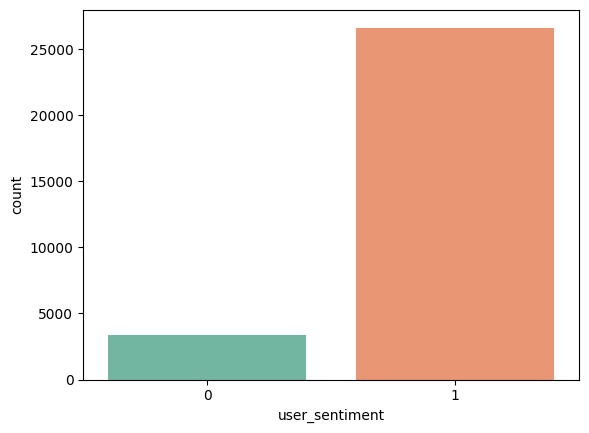

In [17]:

# Visualize this using count plot.
sns.countplot(x="user_sentiment", data= df, palette="Set2")
plt.show()

The plot clearly shows the dominance of positive reviews, which aligns with the numerical proportions of 88.8% positive and 11.2% negative sentiments. We may have to do Class Imbalance techniques during modelling.

In [18]:
df["reviews_rating"].describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
# View the value count for the column
df["reviews_rating"].value_counts()

,count
reviews_rating,
5,20831
4,6020
1,1384
3,1345
2,420


/tmp/ipython-input-20-3557847047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="reviews_rating", data= df,palette='Set1')


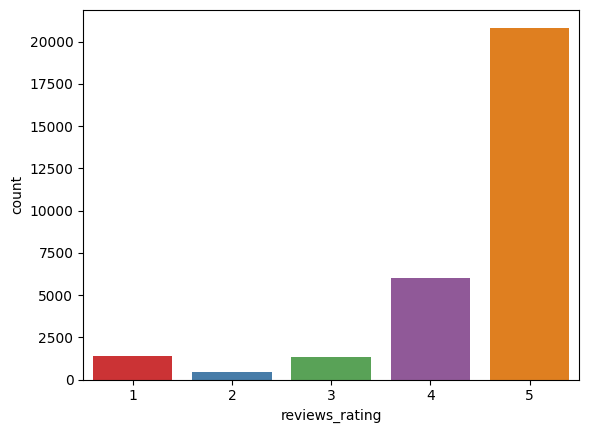

In [20]:
# Visualize this using count plot.
sns.countplot(x="reviews_rating", data= df,palette='Set1')
plt.show()

***Inference:*** The chart shows a strong skew towards positive ratings, with the majority being 5-stars, followed by 4-stars. Lower ratings (1, 2, and 3-stars) are significantly less frequent.

In [21]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

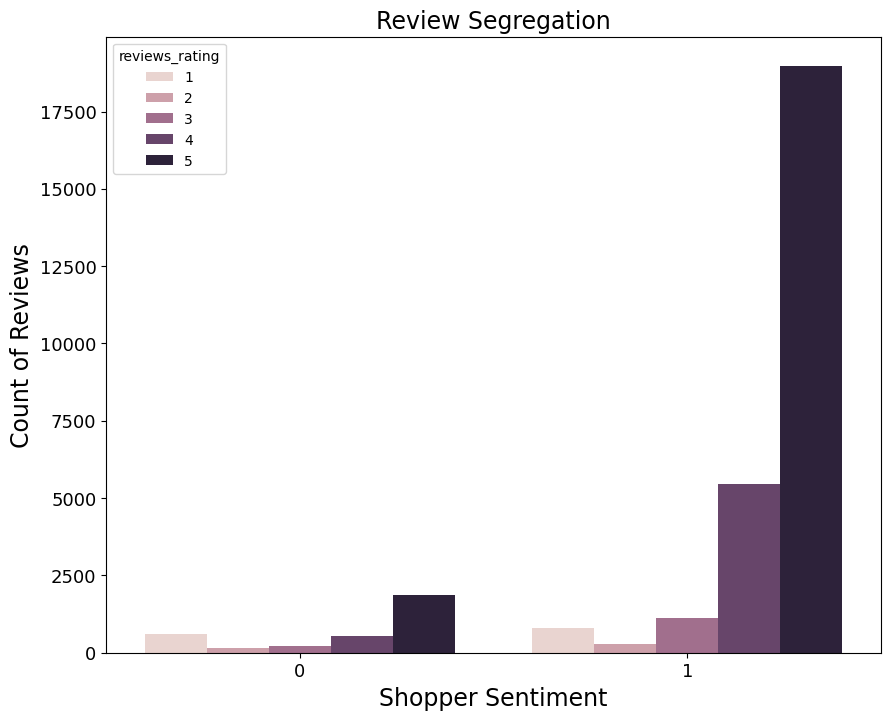

In [22]:

plt.figure(figsize=(10,8))
ax = sns.countplot(x=df['user_sentiment'],hue=df['reviews_rating'])
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Review Segregation', fontsize=17)
ax.tick_params(labelsize=13)

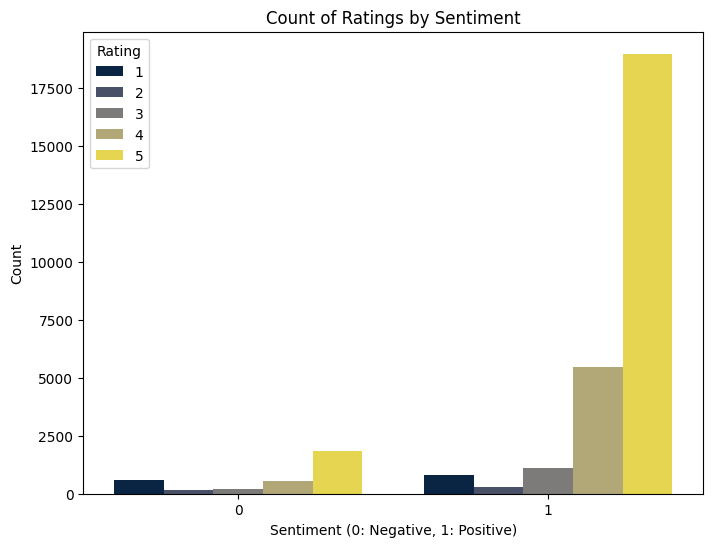

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df['user_sentiment'], hue=df['reviews_rating'], palette='cividis')
plt.title('Count of Ratings by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()


In [24]:
# Get descriptive statistics for review ratings with POSITIVE sentiment
df[df["user_sentiment"]==1]["reviews_rating"].value_counts()

,count
reviews_rating,
5,18971
4,5470
3,1125
1,787
2,280


In [25]:
# Get descriptive statistics for review ratings with NEGATIVE sentiment
df[df["user_sentiment"]==0]["reviews_rating"].value_counts()

,count
reviews_rating,
5,1860
1,597
4,550
3,220
2,140


In [26]:
#checking reviews where rating <=1 and sentiment is positive/1
df.loc[((df["user_sentiment"]==1) & (df["reviews_rating"]<4)),('reviews_title','reviews_text',"reviews_rating"	)]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,1
11,Waste of Money,Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.,1
14,Disappointed,First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.,1
18,Pretty nice,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3
54,New formula is terrible,"I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.",1
...,...,...,...
29050,Didn't Do Much For Dryness,"I received this product from Influenster. I absolutely love the whole system together, it made my hair oil-free for 48 hours. But I expected the conditioner to do more for the dryness at the ends of my hair like advertised. I didn't really notice much of a different in dryness before and after I used it. But overall, I still would probably purchase the system again because of how amazing it worked to get rid of my oily roots. *I received this product compliments of Influenster, but all opini...",3
29051,Not the best,"I used this product for a month straight before reviewing it and I'm not really all that impressed. My hair still gets pretty oily, my ends are still dry.... I mean it cleaned my hair I guess. It's nothing spectacular really. It didn't make my hair extremely soft but it didn't make my hair feel weird or heavy either. This review was collected as part of a promotion.",3
29053,clay conditioning,Got this item as a compliment from influenster but it really made my hair smooth and shining after the usage. This review was collected as part of a promotion.,3
29054,Eh,"I am not in love with the conditioner. The clay mask and shampoo are GREAT but I didn't feel like this did anything for my ends. I would buy the other two, but not this, probably because I have fine hair and my ends need deep conditioning. Smells great though! I got this product free for testing and review purposes but the opinions are entirely my own. ExtraordinaryClay, LorealHair contest, ad, spon, sweepstakes influenster This review was collected as part of a promotion.",3


In [27]:
#checking reviews where rating >=4 and sentiment is negative/0
df.loc[((df["user_sentiment"]==0) & (df["reviews_rating"]>=4)),('reviews_title','reviews_text',"reviews_rating"	)]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,4
96,This product has made a real difference on my skin,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,4
106,Very rich cream,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",4
117,Not greasy,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",4
...,...,...,...
29818,Great Product,"I received a complimentary sample of this product and it worked so well for my hair! I have very thick hair so my roots always get oily and my ends are dry, this left my hair the cleanest it's felt in a long time. Will def recommend this to my family and friends! This review was collected as part of a promotion.",5
29855,Great,This has prolonged the color in my hair! Not only is my hair healthier but I think I'll have to visit my stylist less! This review was collected as part of a promotion.,5
29858,Makes my hair soft and shiny without excess oil!,"This conditioner makes my hair very soft without weighing it down! I was afraid it'd make my roots more oily and weight them down, but it doesn't one bit! My hair is colored, and it hasn't faded out the color either! I'd highly recommend giving this a try! This review was collected as part of a promotion.",5
29862,Great Conditioner,This conditioner has become a staple in my hair regimen This review was collected as part of a promotion.,5


In [28]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,NaN,NaN,rebecca,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,0


In [29]:
# Create a frequency table of user sentiment vs review ratings with totals
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18971,26633
All,1384,420,1345,6020,20831,30000


Insights:
There are records that have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive. We can either clean up those records or update the target column to the correct user sentiment, so that will be helpful for modelling.
As it can be clearly seen there are high user reviews ratings but negative sentiment and low review rating but with positiive user sentiment. So there is a mismatch between review rating and user sentiment which needs to be corrected for efficient modelling.
Hence, updating the user_sentiment to 0 (initially 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(initially 0), when the reviews_rating is greater than or equal to 4

In [30]:
df.loc[((df["user_sentiment"]==1) & (df["reviews_rating"]<4)),'user_sentiment']=0

In [31]:
df.loc[((df["user_sentiment"]==0) & (df["reviews_rating"]>=4)),'user_sentiment']=1

In [32]:
# Create a frequency table of user sentiment vs review ratings with totals
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20831,26851
All,1384,420,1345,6020,20831,30000


This above table shows a clear correlation between user sentiment and review ratings.

Insights:
All negative sentiment reviews are concentrated in the lower ratings (1, 2, and 3). All positive sentiment reviews are concentrated in the higher ratings (4 and 5). There are no negative sentiment reviews with ratings 4 and 5. Positive sentiment reviews dominate the higher ratings, indicating that users with positive sentiment tend to give higher ratings.

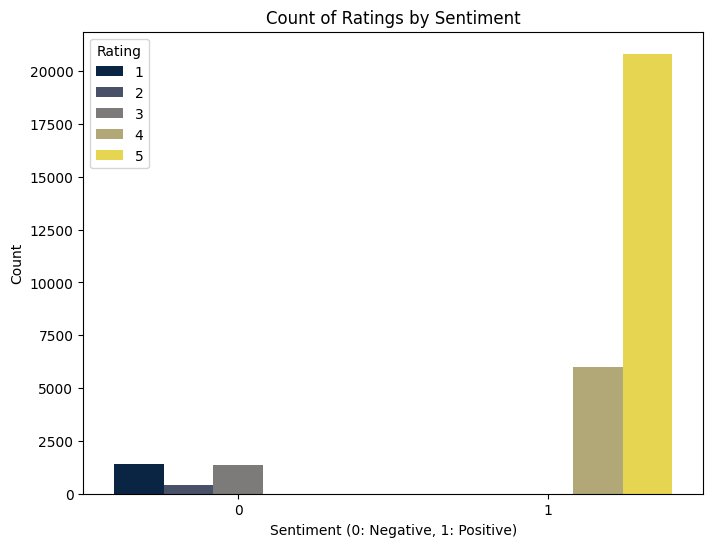

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df['user_sentiment'], hue=df['reviews_rating'], palette='cividis')
plt.title('Count of Ratings by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()


In [34]:
# Count the occurrences of each brand value
df["brand"].value_counts()

,count
brand,
Clorox,10585
Warner Home Video,3325
Disney,1200
L'oreal Paris,1186
FOX,887
...,...
Pacific Natural Foods,1
LDR,1
National Mfg.,1


<Axes: xlabel='brand'>

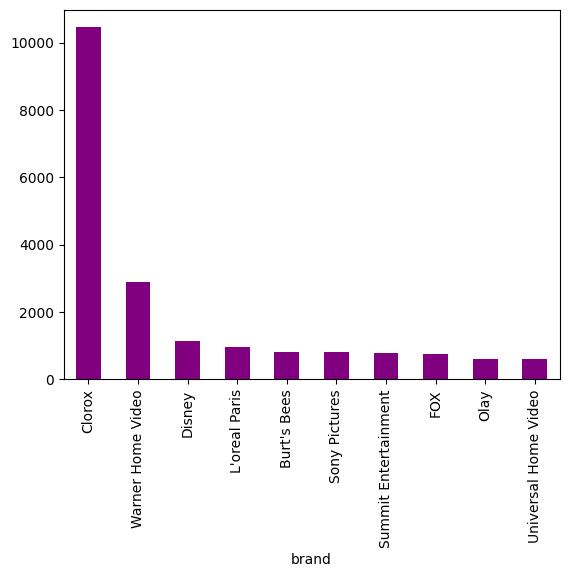

In [35]:
#Finding top 10 brands with positive reviews

df[df['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='purple')

Inference: The plot shows top 10 brands with positive reviews

<Axes: xlabel='brand'>

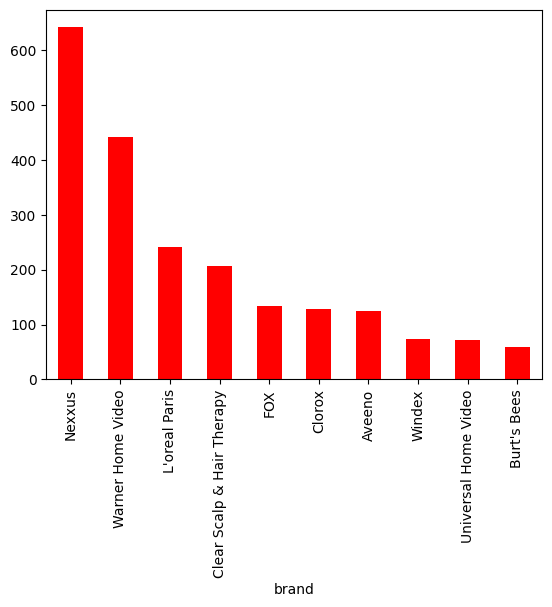

In [36]:
#Finding top 10 brands with negative reviews

df[df['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='r')

Inference: The plot shows top 10 brands with negative reviews

In [37]:
# Count the occurrences of each manufacturer value
df["manufacturer"].value_counts()

,count
manufacturer,
Clorox,8546
Test,3325
AmazonUs/CLOO7,2039
L'oreal Paris,1232
Walt Disney,1143
...,...
Unfi,1
LDR,1
Stanley Hardware,1


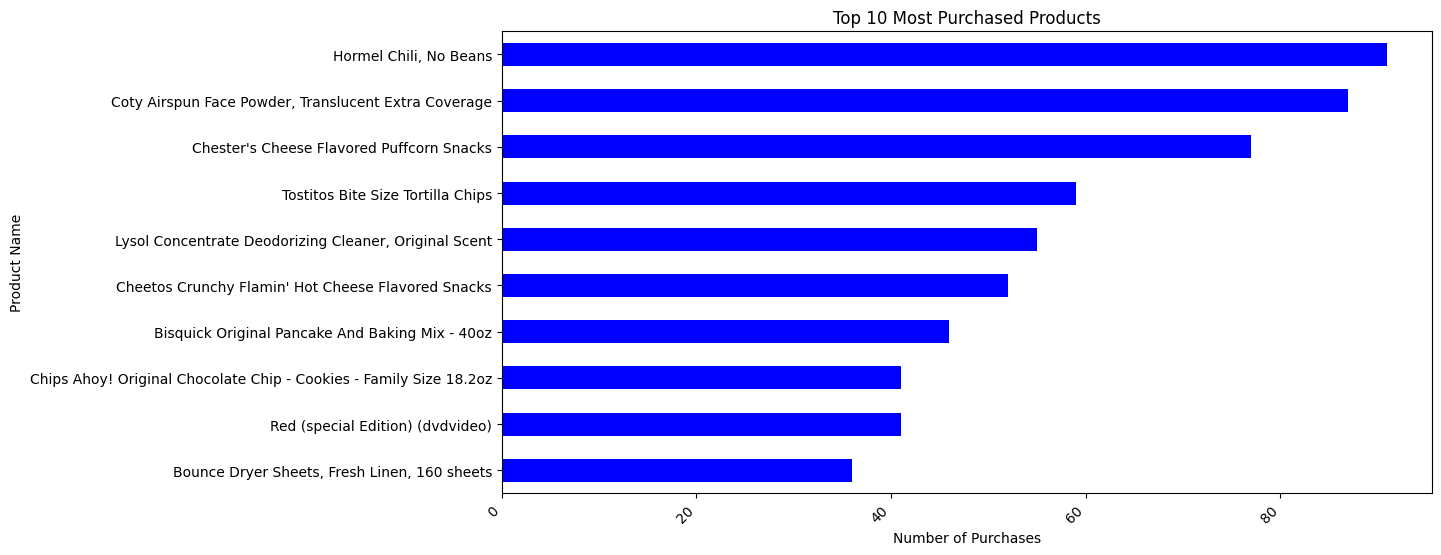

In [38]:
# Top 10 Most Purchased Products
most_purchased_products = df[df['reviews_didPurchase'] == True]['name'].value_counts().head(10).sort_values(ascending=
                                                                                                                      True)

plt.figure(figsize=(12, 6))
most_purchased_products.plot(kind='barh', color='blue')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.show()

Inference: The chart reveals the most popular products, helping identify trends in customer preferences. These insights could guide marketing and inventory decisions.

In [39]:
# Count the occurrences of the top 10 usernames in the reviews which are most common
df["reviews_username"].value_counts()[:10]

,count
reviews_username,
byamazon customer,41
mike,41
chris,32
lisa,16
tony,15
sandy,15
rick,15
john,14
dave,14


<Axes: xlabel='reviews_username'>

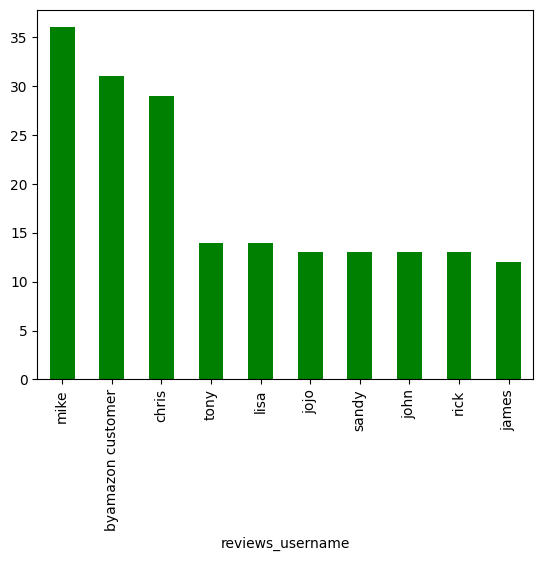

In [40]:
# Find top 10 usernames with the most positive reviews sentiment
df[df['user_sentiment']==1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='g')

Inference : The plot displays top 10 usernames with the most positive reviews sentiment.

<Axes: xlabel='reviews_username'>

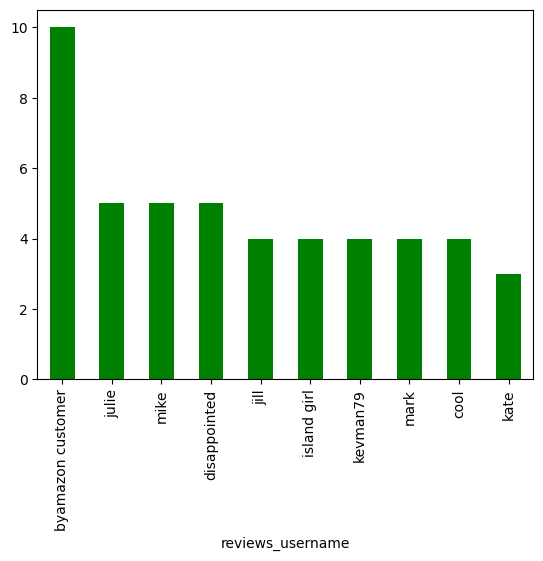

In [41]:
# Find top 10 usernames with the most negative reviews sentiment
df[df['user_sentiment']==0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='g')

Inference : The plot displays top 10 usernames with the most negative reviews sentiment.

In [42]:
# Convert 'reviews_date' to datetime format
df['reviews_date'] = pd.to_datetime(df['reviews_date'], errors='coerce')

# Group data by year and count the number of reviews
yearly = (df
          .groupby(df['reviews_date'].dt.year)['reviews_username']
          .count()
          .reset_index()
          .rename(columns={'reviews_username': 'no_of_reviews', 'reviews_date': 'year'}))



In [43]:
yearly

,year,no_of_reviews
0,2007.0,10
1,2008.0,22
2,2009.0,451
3,2010.0,336
4,2011.0,424
5,2012.0,4261
6,2013.0,1242
7,2014.0,8200
8,2015.0,6233
9,2016.0,4881


/tmp/ipython-input-44-1507022512.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=yearly, x='year',y='no_of_reviews',palette='cividis')


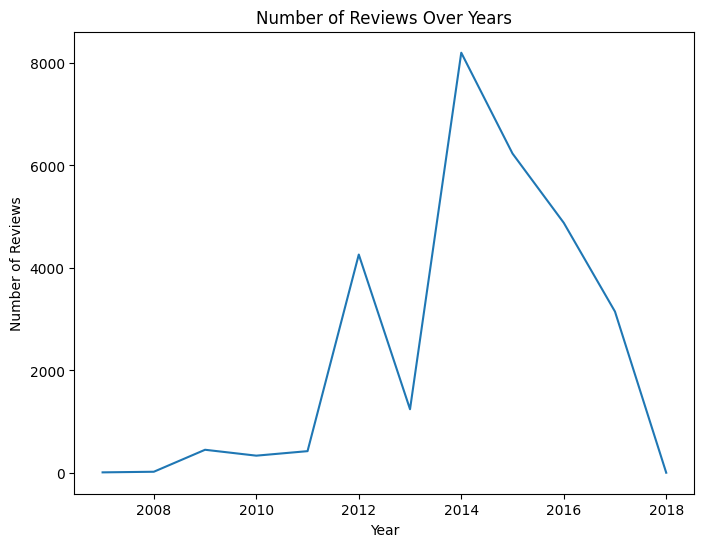

In [44]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=yearly, x='year',y='no_of_reviews',palette='cividis')
plt.title('Number of Reviews Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

***Inference:***

Yearly Insights: There is a gradual increase in the number of reviews over the years, indicating growing customer engagement.


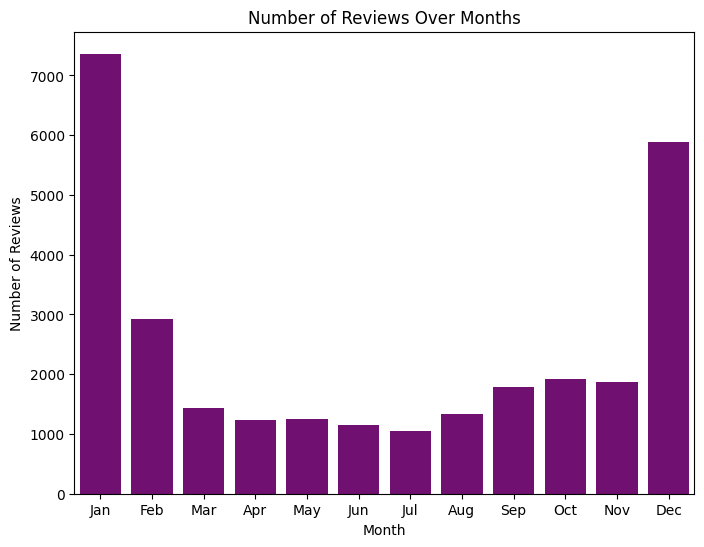

In [45]:
# Group by month (ignoring year) and count the number of reviews
monthly = (df
           .groupby(df['reviews_date'].dt.month)['reviews_username']
           .count()
           .reset_index()
           .rename(columns={'reviews_username': 'no_of_reviews', 'reviews_date': 'month'}))

# Define month names for x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(8, 6))
# Create the monthly bar plot
sns.barplot(x='month', y='no_of_reviews', data=monthly, color='purple')
plt.title('Number of Reviews Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

# Set x-axis labels to month names
plt.xticks(range(12),month_names)
plt.show()

***Monthly Insights:*** A consistent trend is observed in monthly reviews, with peaks potentially aligned with seasonal or promotional events.

In [46]:
df.reviews_username.isna().value_counts()

,count
reviews_username,
False,29937
True,63


In [47]:
# Remove rows with NAN/null usernames from the reviews DataFrame
df = df[~df.reviews_username.isnull()]

In [48]:
# Fill null titles with empty strings and combine the reviews_text and reviews_title for better analysis
df["reviews_title"] = df["reviews_title"].fillna('')

/tmp/ipython-input-48-2304883907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews_title"] = df["reviews_title"].fillna('')


In [49]:
df["reviews_full_text"] = df[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

/tmp/ipython-input-49-2779615325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews_full_text"] = df[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')


In [50]:
# Calculate the number of missing rows in the reviews
df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,726
reviews_didPurchase,14006
reviews_doRecommend,2541
reviews_rating,0
reviews_text,0


# **3- Text Processing**

In [51]:
df[["reviews_full_text", "user_sentiment"]].sample(10)

,reviews_full_text,user_sentiment
24534,WAY better..... Movie is a lot better than the last on. More intense storyline.,1
17244,dryer sheets. great product,1
5255,"Great movies. Very nice set for the money, just have to wait for the last one to come out",1
3855,"Excellent Idea. I ordered a pack of these folders, after receiving my sample package from you, to use for my boss's meeting folders where he has multiple handouts. I like the idea of separate pockets. Could be better constructed noticed that the pockets tend to tear easily.",1
22612,"Love this shampoo!. I love how this works on my hair! However I am not a fan of the new scent, I miss the old scent! I have used this since it first came out, the original scent was awesome to wake up to.",1
17164,Good rice blend. This is a nice blend of rice. My family eats rice everyday as one of our primary grains and I try to use as many different varieties as I can so it doesn't get boring.,1
29385,"Not Sure How I Feel About It?. In the shower, my hair with the product felt super soft and conditioned. But after I let my hair air dry, it was incredibly frizzy and tangled.. I received these products free/complimentary for testing purposes This review was collected as part of a promotion.",1
17777,Great Deoderant. This deodetant is great!! It smells wonderful. The only thing that I fid not like is the smell does not stay for more than a few hours. I have used deoderants that still smell good after getting home from a 12 hour shift at the hospital. That is the only thing this deoderant lacks. It keeps the oder away but the scent wasnt there. This review was collected as part of a promotion.,1
2618,Ok sequel .. It was an ok sequel. Not as good as the first one and had a lot of the same jokes as the first.,0
6668,Easy To Use. I have a 1.5 year old so these are so easy when he makes a mess. This review was collected as part of a promotion.,1


In [52]:
# Function to clean text by removing punctuation, numbers, and unnecessary elements

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)

    return text

In [53]:
df_clean = df[['id','name', 'reviews_full_text', 'user_sentiment']]
# Apply the clean_text function to the full review text
df_clean["reviews_text"] = df_clean.reviews_full_text.apply(lambda x: clean_text(x))

/tmp/ipython-input-53-1820754989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["reviews_text"] = df_clean.reviews_full_text.apply(lambda x: clean_text(x))


In [54]:
# Removes English stopwords from the given text

stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [55]:
# Map POS tag to WordNet POS using below helper function (default to NOUN if no matchfound)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [56]:
# Lemmatize the given textr based on word position tags.
lemmatizer = WordNetLemmatizer()

# Lemmatize the sentence
def lemmatize_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(words)

In [57]:
# Clean and lemmatize the review text
df_clean["reviews_text_cleaned"] = df_clean.reviews_text.apply(lambda x: lemmatize_text(x))
df_clean.head()

/tmp/ipython-input-57-3596497440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["reviews_text_cleaned"] = df_clean.reviews_text.apply(lambda x: lemmatize_text(x))


,id,name,reviews_full_text,user_sentiment,reviews_text,reviews_text_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captiva...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation ...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


In [58]:
!pip install wordcloud

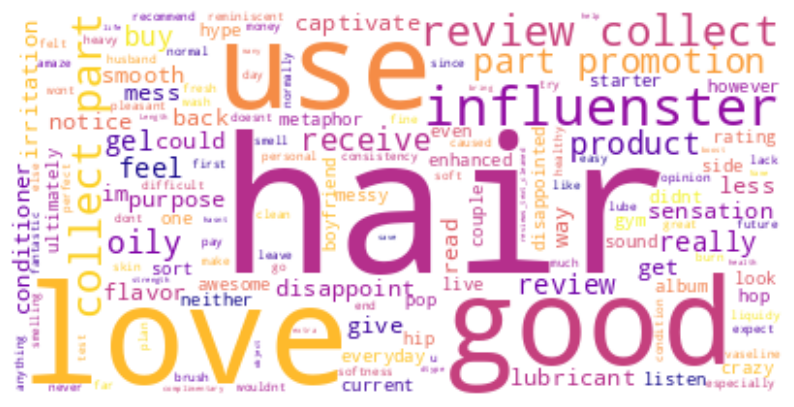

In [59]:
# Generate and display a Word cloud to find the top 40 words by frequency among all the articles from the cleaned review text
from wordcloud import WordCloud

# Generate the word cloud with a specific colormap
wordcloud = WordCloud(background_color="white", stopwords=stop_words, max_words=200, colormap='plasma').generate(str(df_clean.reviews_text_cleaned))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
#getting most common words from review

def commonwords(df,num):
  df=[word for d in df for word in d.split()]
  return pd.DataFrame(FreqDist(df).most_common(num))

commonwords(df_clean.reviews_text_cleaned,10)

,0,1
0,great,15024
1,use,13520
2,love,12989
3,product,12739
4,movie,10889
5,review,9482
6,part,9192
7,promotion,8746
8,wipe,8317
9,clean,8305


In [61]:
#getting most common words from positive review

commonwords(df_clean.loc[df_clean['user_sentiment']==1,'reviews_text_cleaned'],10)

,0,1
0,great,14397
1,love,12432
2,use,11726
3,product,10805
4,movie,9856
5,review,8881
6,part,8728
7,promotion,8374
8,wipe,8189
9,clean,8075


In [62]:
#getting most common words from positive review

commonwords(df_clean.loc[df_clean['user_sentiment']==0,'reviews_text_cleaned'],10)

,0,1
0,product,1934
1,use,1794
2,hair,1575
3,formula,1439
4,new,1261
5,like,1090
6,old,1078
7,good,1075
8,movie,1033
9,gel,876


In [63]:
from collections import Counter
def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


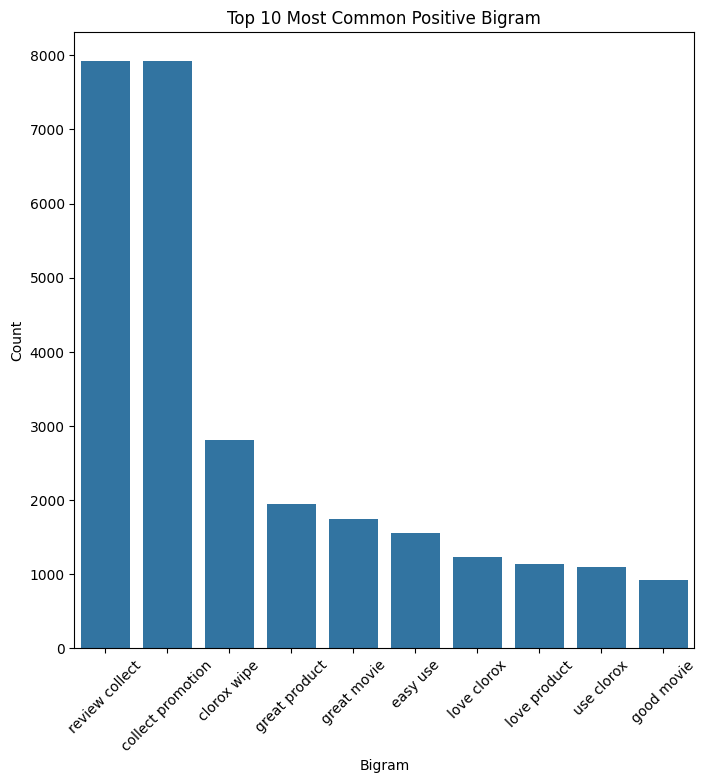

In [64]:
# Get the top 10 most common bigrams from POSITIVE reviews and convert to DataFrame
pos_reviews=df_clean.loc[df_clean['user_sentiment']==1]
pos_common_words = get_top_n_ngram(pos_reviews['reviews_text_cleaned'], 2, 10)
pos_bigram_df=pd.DataFrame(pos_common_words)
plt.figure(figsize=[8,8])
fig = sns.barplot(x=pos_bigram_df[0], y=pos_bigram_df[1])
fig.set_xlabel('Bigram')
plt.xticks(rotation=45, ha='center')
fig.set_ylabel('Count')
fig.set_title('Top 10 Most Common Positive Bigram')
plt.show()

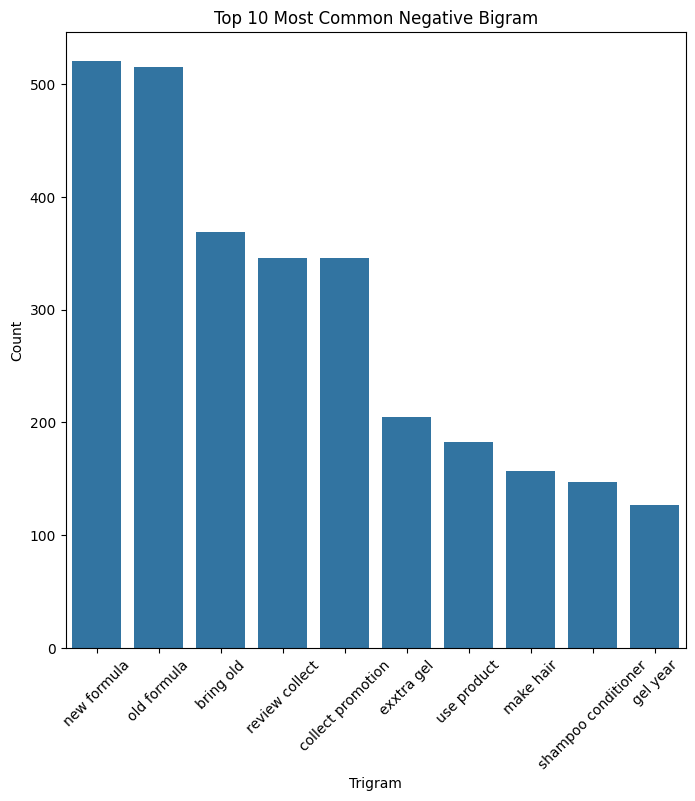

In [65]:
# Get the top 10 most common bigrams from NEGATIVE reviews and convert to DataFrame
neg_reviews=df_clean.loc[df_clean['user_sentiment']==0]
neg_common_words = get_top_n_ngram(neg_reviews['reviews_text_cleaned'], 2, 10)
neg_bigram_df=pd.DataFrame(neg_common_words)
plt.figure(figsize=[8,8])
fig = sns.barplot(x=neg_bigram_df[0], y=neg_bigram_df[1])
fig.set_xlabel('Trigram')
plt.xticks(rotation=45, ha='center')
fig.set_ylabel('Count')
fig.set_title('Top 10 Most Common Negative Bigram')
plt.show()

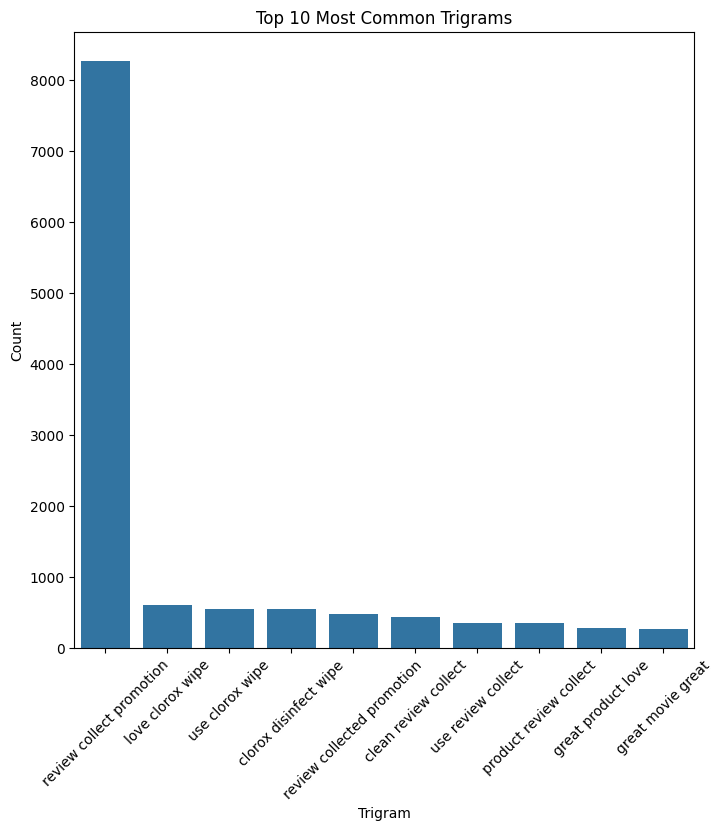

In [66]:
# Get the top 10 most common trigrams from the cleaned review text and plot a bar chart
common_words = get_top_n_ngram(df_clean.reviews_text_cleaned, 3, 10)
trigram_df = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
plt.figure(figsize=[8,8])
fig = sns.barplot(x=trigram_df['trigram'], y=trigram_df['count'])
fig.set_xlabel('Trigram')
plt.xticks(rotation=45, ha='center')
fig.set_ylabel('Count')
fig.set_title('Top 10 Most Common Trigrams')
plt.show()

#4- **Feature Extraction**

In [67]:
# Defining (X) and target (y) for the model

X = df_clean['reviews_text_cleaned']
y = df_clean['user_sentiment']

In [68]:
# Get the number of unique classes in the target variable
no_of_classes= len(pd.Series(y).value_counts())
no_of_classes

2

In [69]:
# percentage of each class in the target variable data in terms of proportions
pd.Series(y).value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

,proportion
user_sentiment,
1,89.53%
0,10.47%


We will use TF-IDF vectorizer method to vectorize the data and derive the features from the textual data.
<br>
There is clearly a class-imbalance between positive and negative sentiment, let's do SMOTE oversampling technique before modelling.

In [70]:
# Vectorize the cleaned review text using TF-IDF and define the target variable and get 650 features

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True,
                                   ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(df_clean['reviews_text_cleaned'])

y= df_clean['user_sentiment']


In [71]:
X_train_tfidf.shape

(29937, 650)

In [72]:
# Print the feature names from the TF-IDF vectorizer
print(tfidf_vectorizer.get_feature_names_out())

['able' 'absolutely' 'absolutely love' 'act' 'action' 'action movie'
 'actor' 'actually' 'add' 'age' 'ago' 'amaze' 'amazing' 'apply' 'area'
 'ask' 'available' 'away' 'awesome' 'awesome movie' 'awesome product'
 'awful' 'baby' 'bad' 'bag' 'bathroom' 'bathroom kitchen' 'beautiful'
 'bee' 'begin' 'believe' 'best' 'best buy' 'best product' 'big' 'bit'
 'black' 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle' 'box' 'boy'
 'brand' 'break' 'bring' 'bring cocoa' 'bring old' 'brown' 'burt'
 'burt bee' 'buy' 'canister' 'car' 'care' 'carpet' 'carry' 'cast' 'cd'
 'chair' 'change' 'character' 'cheap' 'child' 'chip' 'classic' 'classroom'
 'clay' 'clean' 'clean bathroom' 'clean disinfect' 'clean easy'
 'clean fresh' 'clean great' 'clean kitchen' 'clean love' 'clean mess'
 'clean product' 'clean review' 'clean smell' 'clean ups' 'clean use'
 'clean wipe' 'cleaner' 'cleaning' 'cleanup' 'clear' 'clorox'
 'clorox disinfect' 'clorox love' 'clorox product' 'clorox wipe' 'close'
 'cocoa' 'cold' 'collect' '

In [73]:
# Split the data into training and testing sets
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=42, test_size=0.25)

In [74]:
# Balance the dataset using SMOTE
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()


# Transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 20088, 0: 2364})
After Counter({1: 20088, 0: 20088})


#5- **Model Building**

In [75]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = np.round((y_pred == y_test).mean() * 100, 2)
    precision = np.round(precision_score(y_test, y_pred) * 100, 2)
    recall = np.round(recall_score(y_test, y_pred) * 100, 2)
    f1 = np.round(f1_score(y_test, y_pred) * 100, 2)
    roc_auc = np.round(roc_auc_score(y_test, y_prob) * 100, 2)

    # Print metrics
    print("******************************")
    print(f"Accuracy is : {accuracy}%")
    print(f"Precision is : {precision}%")
    print(f"Recall is : {recall}%")
    print(f"F1 Score is : {f1}%")
    print(f"Roc-Auc Score is: {roc_auc}%")
    print("******************************")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    print("******************************")

    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Negative","Positive"],
                yticklabels=["Negative","Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

       # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

# **Logistic Regression**

In [76]:
# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

******************************
Accuracy is : 88.15%
Precision is : 96.56%
Recall is : 89.99%
F1 Score is : 93.16%
Roc-Auc Score is: 89.84%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.72      0.56       771
           1       0.97      0.90      0.93      6714

    accuracy                           0.88      7485
   macro avg       0.71      0.81      0.74      7485
weighted avg       0.91      0.88      0.89      7485

******************************


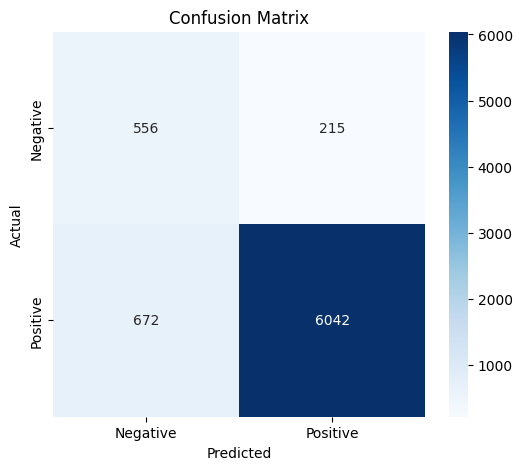

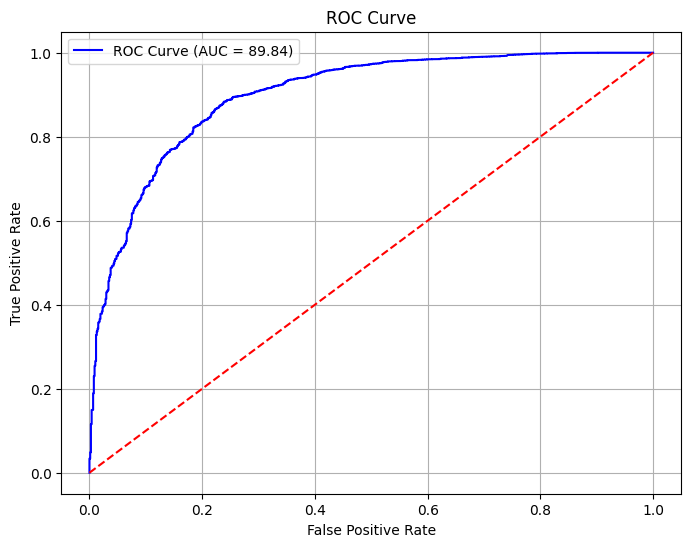

In [77]:
# Train the logistic regression model and evaluate its performance using various metrics

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_lr, y_prob_lr)

# **Naive Bayes**

In [78]:
#Initialize the Naive Bayes classifier and create a ModelBuilder instance using the classifier and the training/testing data

nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

******************************
Accuracy is : 80.83%
Precision is : 97.53%
Recall is : 80.67%
F1 Score is : 88.3%
Roc-Auc Score is: 89.54%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.82      0.47       771
           1       0.98      0.81      0.88      6714

    accuracy                           0.81      7485
   macro avg       0.65      0.81      0.68      7485
weighted avg       0.91      0.81      0.84      7485

******************************


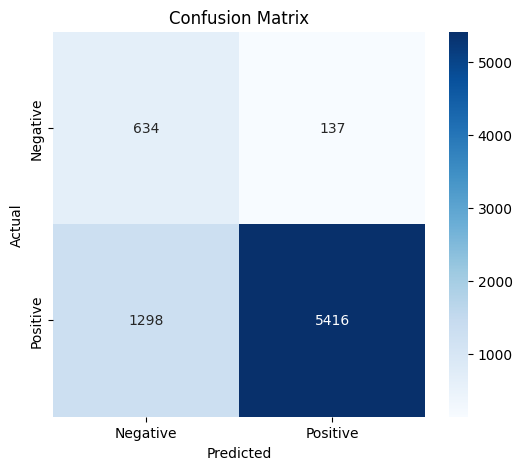

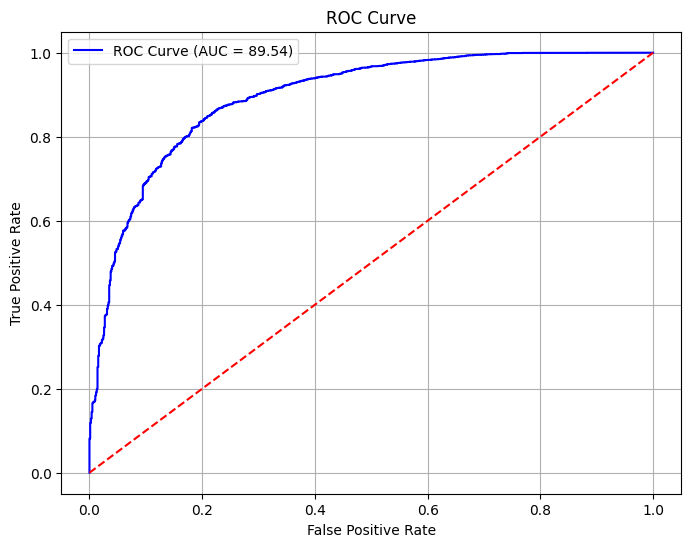

In [79]:
# Training and evaluating its performance
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_nb, y_prob_nb)

# **Decision Tree**

In [80]:
#Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

******************************
Accuracy is : 82.44%
Precision is : 95.69%
Recall is : 84.23%
F1 Score is : 89.59%
Roc-Auc Score is: 81.95%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.67      0.44       771
           1       0.96      0.84      0.90      6714

    accuracy                           0.82      7485
   macro avg       0.64      0.76      0.67      7485
weighted avg       0.89      0.82      0.85      7485

******************************


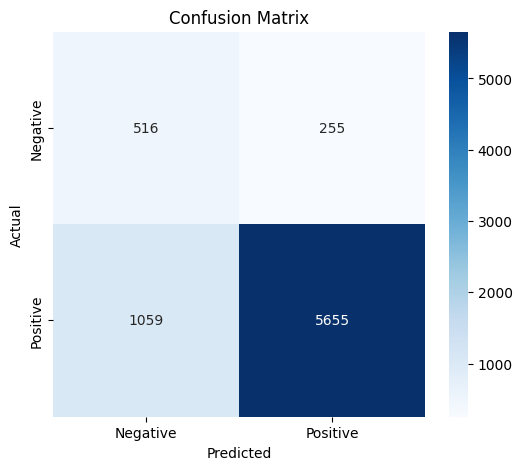

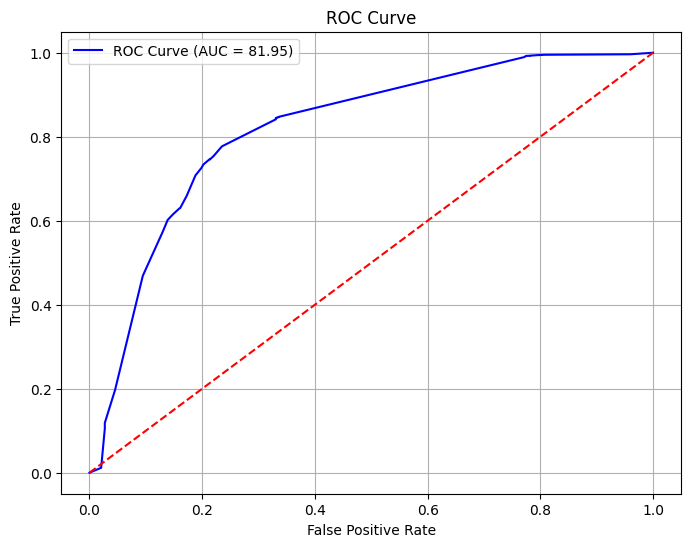

In [81]:
# Training and evaluating its performance
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_dt, y_prob_dt)

# **Random Forest Classifier**

In [82]:
# Initialize Random Forest classifier with out-of-bag score enabled and definig hyperparameter for tuning the classifier
rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [83]:
#Setting up grid search to find best settings using cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [84]:
# Measure the time taken to fit the grid search model on training data
%time
grid_search.fit(X_train, y_train)
# Get the best RandomForestClassifier from the grid search
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Fitting 4 folds for each of 64 candidates, totalling 256 fits


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       oob_score=True, random_state=42)

******************************
Accuracy is : 82.44%
Precision is : 95.69%
Recall is : 84.23%
F1 Score is : 89.59%
Roc-Auc Score is: 81.95%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.67      0.44       771
           1       0.96      0.84      0.90      6714

    accuracy                           0.82      7485
   macro avg       0.64      0.76      0.67      7485
weighted avg       0.89      0.82      0.85      7485

******************************


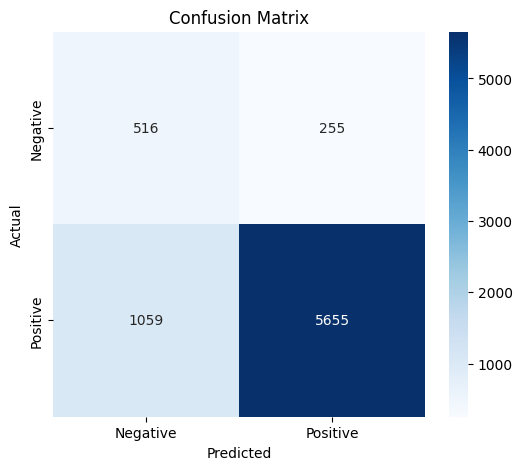

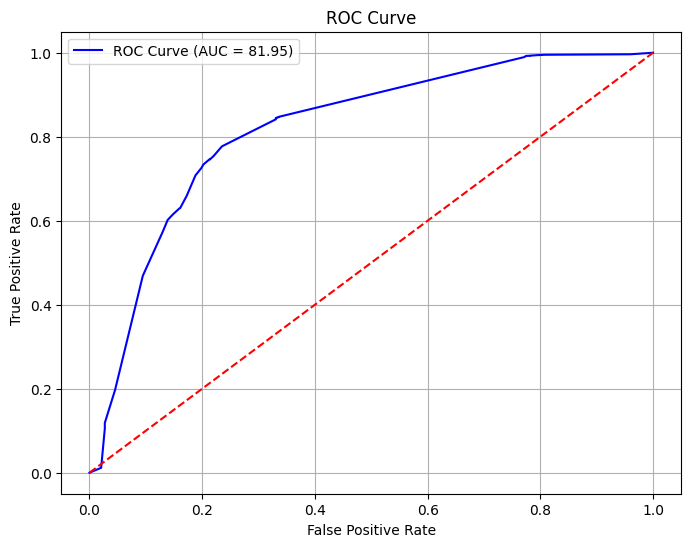

In [85]:
# Training and evaluating its performance
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_dt, y_prob_dt)

# **XGBoost Classifier**

In [86]:
# Initialize an XGBoost classifier
!pip  install xgboost
import xgboost as xgb


In [87]:
xgclf = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42) #based on the tuned parameters
xgclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

******************************
Accuracy is : 90.34%
Precision is : 95.73%
Recall is : 93.4%
F1 Score is : 94.55%
Roc-Auc Score is: 90.74%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       771
           1       0.96      0.93      0.95      6714

    accuracy                           0.90      7485
   macro avg       0.74      0.79      0.76      7485
weighted avg       0.91      0.90      0.91      7485

******************************


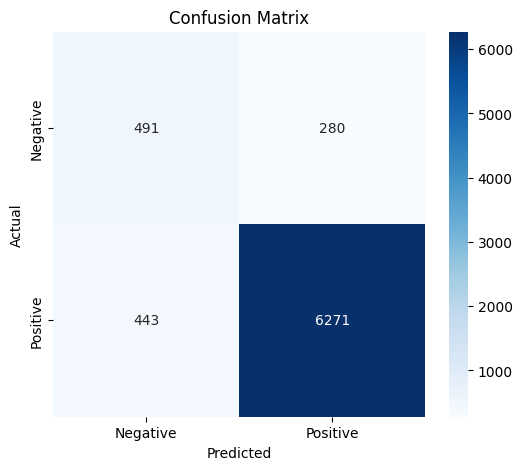

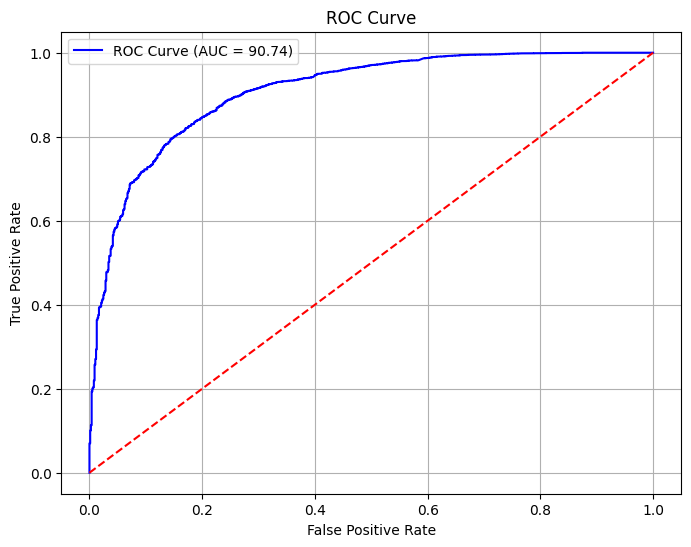

In [88]:
# Train and Predict the Test Labels
y_pred_xgb = xgclf.predict(X_test)
y_prob_xgb = xgclf.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

<h3><b> Model Inference </h3>

In [89]:
# Define a function to calculate and return evaluation metrics
def get_metrics(y_test, y_pred, y_prob, model_name):
    accuracy = np.round((y_pred == y_test).mean() * 100, 2)
    precision = np.round(precision_score(y_test, y_pred) * 100, 2)
    recall = np.round(recall_score(y_test, y_pred) * 100, 2)
    f1 = np.round(f1_score(y_test, y_pred) * 100, 2)
    roc_auc = np.round(roc_auc_score(y_test, y_prob) * 100, 2)

    return {
        'Model': model_name,
        'Accuracy (%)': accuracy,
        'Precision (%)': precision,
        'Recall (%)': recall,
        'F1-Score (%)': f1,
        'ROC-AUC (%)': roc_auc
    }

# Initialize an empty list to store metrics for each model
metrics_list = []

# Logistic Regression
metrics_list.append(get_metrics(y_test, y_pred_lr, y_prob_lr, 'Logistic Regression'))

# Random Forest
metrics_list.append(get_metrics(y_test, y_pred_dt, y_prob_dt, 'Decision Tree'))

# Random Forest
metrics_list.append(get_metrics(y_test, y_pred_rf, y_prob_rf, 'Random Forest'))

# XGBoost
metrics_list.append(get_metrics(y_test, y_pred_xgb, y_prob_xgb, 'XGBoost'))

# Naive Bayes
metrics_list.append(get_metrics(y_test, y_pred_nb, y_prob_nb, 'Naive Bayes'))

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame

In [90]:
metrics_df

,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%),ROC-AUC (%)
0,Logistic Regression,88.15,96.56,89.99,93.16,89.84
1,Decision Tree,82.44,95.69,84.23,89.59,81.95
2,Random Forest,80.15,96.46,80.83,87.96,86.21
3,XGBoost,90.34,95.73,93.40,94.55,90.74
4,Naive Bayes,80.83,97.53,80.67,88.30,89.54


 As it can be clearly seen from the metrics of all the models, XGBoost clearly is a better model as compared to the others. Saving the XGBoost model as a pickle file for later use.

# **Hyperparameter Tuning (Best Model-XGBoost)**

In [ ]:
#Fine tuning the model

param_distributions_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_distributions_xgb,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
# Evaluate the best model
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the tuned XGBoost model
evaluate_model(y_test, y_pred_best_xgb, y_prob_best_xgb)

<h3>Saving the model</h3>

In [ ]:
import os
import pickle

# Save the given object to a file in the 'pickle' directory with a .pkl extension
def save_object(obj, filename):
    directory = "/content/drive/My Drive/data/pickle"
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = os.path.join(directory, filename + '.pkl')
    pickle.dump(obj, open(filepath, 'wb'))


In [ ]:
save_object(xgclf, 'sentiment-classification-xg-boost-model')

In [ ]:
save_object(tfidf_vectorizer, 'tfidf-vectorizer')


In [ ]:
save_object(df_clean, 'cleaned-data')

#6- **Building the Recommendation Systems**

We will explore different approaches to develop the Recommendation System:

1. User-User Based Approach
2. Item-Item Based Approach

In [ ]:
df.info()


In [ ]:
#Create another dataframe to calculate number of missing values in it
df_recommendation = df[["id", "name", "reviews_rating", "reviews_username"]]
df_recommendation.isnull().sum()


In [ ]:
# Split the data set into train and test set
train_rdf, test_rdf = train_test_split(df_recommendation, test_size=0.25, random_state=42)
print(train_rdf.shape)
print(test_rdf.shape)

In [ ]:
print(test_rdf.shape)

In [ ]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"


In [ ]:
# Transform the training ratings dataset into a matrix with products as columns and users as rows, filling missing values with 0
df_pivot = pd.pivot_table(train_rdf,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

<h3> Creating dummy train and test dataset</h3>

These dataset will be used for prediction

Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The producsts not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train_rdf.copy()


In [ ]:
# Copy the train dataset into dummy_train
dummy_test = test_rdf.copy()


In [ ]:
dummy_train.head()

In [ ]:
# Mark unrated products as 1 for prediction
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Pivot the train ratings dataset into matrix format where columns are product names and the rows are user names
dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

# **User similarity matrix**

In [ ]:
df_pivot.index.nunique()

In [ ]:
# Importing necessary functions
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
# Compute user similarity using cosine similarity (distance) and handle NaN values

user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

# <h3>Prediction User User<h3>


Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [ ]:
#filtering out the user_correlation that are negatively correlated and se tto zero
user_correlation[user_correlation<0]=0
user_correlation

In [ ]:
#Predict user ratings by multiplying user correlation matrix with ratings matrix
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

In [ ]:
user_predicted_ratings.shape

In [ ]:
# As we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

# <h3><b> Top 20 recommendations for the User </h3>

In [ ]:
user_input = "08dallas"
print(user_input)


In [ ]:
# Get top 20 product recommendations for the user
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations


In [ ]:
# Display top 20 product IDs, names, and similarity scores
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score': recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train_rdf, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

# **Evaluation User User**

In [ ]:
# Identify common users in test and train datasets
common = test_rdf[test_rdf.reviews_username.isin(train_rdf.reviews_username)]
common.head()

In [ ]:
common.shape

In [ ]:
# Convert common users' data into a user-product matrix
common_user_based_matrix = pd.pivot_table(common, index=user_column, columns=product_column, values=value_column)
common_user_based_matrix.head()

In [ ]:
# Converting the user correlation matrix to a data frame
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

In [ ]:
df_pivot.index

In [122]:
# Add the user identifiers to the correlation data frame and set as index
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column, inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19421,19422,19423,19424,19425,19426,19427,19428,19429,19430
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
01impala,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02deuce,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0


In [123]:
#Filter user correlation data frame for common users
list_name = common.reviews_username.tolist()


In [124]:

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 = user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df_1.shape


(1531, 19431)

In [125]:
# Calculate the transpose and filter user correlation data frame for common users
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [126]:
# Transpose the filtered user correlation data frame back to original
user_correlation_df_3 = user_correlation_df_2.T


In [127]:
user_correlation_df_3.head()

,1234,1234567,123charlie,1witch,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,...,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.0,0.662266,0.0,0.0,0.0,0.0,0.0,0.611775,0.0,...,0.330972,0.0,0.0,0.0,0.0,0.529813,0.0,0.0,0.374634,0.0
1234567,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.000000,1.0
123charlie,0.662266,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1witch,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
85lisa,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.000000,1.0


In [128]:
user_correlation_df_3.shape

(1531, 1531)

In [129]:
# Set negative correlations to zero and predict ratings for common users
user_correlation_df_3[user_correlation_df_3 < 0] = 0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 7.79183531, 0.        , ..., 0.        , 0.        ,
        1.3043093 ],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.31227896, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.86700847, 0.        , ..., 0.        , 0.        ,
        1.74077656],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ]])

In [130]:
# Prepare test dataset by marking rated products and converting to matrix format
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=user_column, columns=product_column, values=value_column).fillna(0)
dummy_test.shape

(1531, 129)

In [131]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
dummy_test.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.**

In [134]:
# Scale predicted ratings to range 1-5 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_user_predicted_ratings.copy()
X = X[X > 0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = scaler.transform(X)

print(y)


MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [135]:
# Convert common users' data into a user-product matrix
common_ = pd.pivot_table(common, index=user_column, columns=product_column, values=value_column)

In [136]:
# Finding out total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [137]:
# Calculate and print the Root Mean Square Error (RMSE)
rmse = (sum(sum((common_ - y)**2)) / total_non_nan)**0.5
print(rmse)

2.084841852467448


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# **Item Based Recommendation**

In [138]:
# Convert training data into a product-user matrix
df_pivot = pd.pivot_table(train_rdf,
    index=product_column,
    columns=user_column,
    values=value_column
)

In [139]:
df_pivot.head()


reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Normalize ratings by subtracting the mean rating for each product
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T - mean).T
df_subtracted.head()


reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [141]:
# Compute item similarity matrix using cosine similarity
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [142]:
# Set negative item correlations to zero
item_correlation[item_correlation < 0] = 0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# <h3> <b> Prediction - item-item</h3>

In [143]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00566789, 0.06117677,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00925502],
       [0.        , 0.        , 0.        , ..., 0.00713196, 0.10196128,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00740402]])

In [144]:
item_predicted_ratings.shape

(19431, 260)

<h3> <b> Filtering the rating only for the products not rated by the user for recommendation </h3>

In [145]:
# Zero out ratings for items already rated by users
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.009141,0.0,0.0,0.0,0.00000,0.000000,0.005833,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.019346,0.005668,0.061177,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.004556,...,0.0,0.092854,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.007593,...,0.0,0.154756,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.006074,...,0.0,0.123805,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00132,0.003772,0.001795,...,0.0,0.000000,0.003785,0.0,0.0,0.0,0.005955,0.000000,0.000000,0.009255


# <h3><b> Finding the top 20 recommendation for the user </h3>

In [146]:
# Take the user ID as input and print it
user_input = '08dallas'
print(user_input)

08dallas


In [147]:
# Recommend the top 5 products to the user
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations


,08dallas
id,
AVpfE7puilAPnD_xUcCW,0.530077
AVpfNc9cLJeJML434tza,0.286131
AVpe9W4D1cnluZ0-avf0,0.139978
AVpfPaoqLJeJML435Xk9,0.049780
AVpe41TqilAPnD_xQH3d,0.048034
AVpe59io1cnluZ0-ZgDU,0.042933
AVpf7I3i1cnluZ0-tnL6,0.040555
AVpe8xjUilAPnD_xRkxC,0.035741
AVpe7GIELJeJML43yZfu,0.032604


In [148]:
# Display top 20 product IDs, names, and similarity scores
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score': item_recommendations})
item_final_recommendations.reset_index(drop=True)



,product_id,similarity_score
0,AVpfE7puilAPnD_xUcCW,0.530077
1,AVpfNc9cLJeJML434tza,0.286131
2,AVpe9W4D1cnluZ0-avf0,0.139978
3,AVpfPaoqLJeJML435Xk9,0.049780
4,AVpe41TqilAPnD_xQH3d,0.048034
5,AVpe59io1cnluZ0-ZgDU,0.042933
6,AVpf7I3i1cnluZ0-tnL6,0.040555
7,AVpe8xjUilAPnD_xRkxC,0.035741
8,AVpe7GIELJeJML43yZfu,0.032604
9,AVpf2tw1ilAPnD_xjflC,0.007387


In [149]:
# final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train_rdf, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.530077
5,AVpfNc9cLJeJML434tza,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,0.286131
11,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,0.139978
267,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,0.049780
2731,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.048034
3304,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.042933
3798,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,0.040555
3819,AVpe8xjUilAPnD_xRkxC,The Honest Company Laundry Detergent,0.035741
3833,AVpe7GIELJeJML43yZfu,Eagle Fat Free Sweetened Condensed Milk,0.032604
3847,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),0.007387


# Item- Item Evaluation

In [150]:
#Filter rows in 'test' that have matching 'id' in 'train' and get the shape of the resulting data frame
common = test_rdf[test_rdf.id.isin(train_rdf.id)]
common.shape


(7473, 4)

In [151]:
common.head(4)


,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha


In [152]:
# Generate a pivot table from common with products as rows and users as columns
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)


In [153]:
# Convert item_correlation to a data frame and display the first row
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# Assign product names to item_correlation_df index and set it as the data frame index
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column, inplace=True)
item_correlation_df.head()
list_name = common.id.tolist()


In [155]:
# Rename columns of item_correlation_df with product names and filter rows based on list_name
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 = item_correlation_df[item_correlation_df.index.isin(list_name)]


In [156]:
# Transpose item_correlation_df_1, filter rows based on 'list_name', and transpose back to original
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T

In [157]:
df_subtracted


reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfshNsLJeJML43CB8q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpftikC1cnluZ0-p31V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# Replace negative values in item_correlation_df_3 with zero and compute predicted ratings by dot product of matrices
item_correlation_df_3[item_correlation_df_3 < 0] = 0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00740402, ..., 0.        , 0.        ,
        0.00925502]])

In [159]:
# Create a binary dummy_test DataFrame, pivot it, and adjust predicted ratings by element-wise multiplication
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings, dummy_test)


In [160]:
# Create a pivot table from 'common' with products as rows and users as columns
common_ = pd.pivot_table(common, index=product_column, columns=user_column, values=value_column)

In [161]:
#Scale positive predicted ratings to a range of 1 to 5 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_item_predicted_ratings.copy()
X = X[X > 0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = scaler.transform(X)

print(y)


MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [162]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [163]:
# Calculate and print the Root Mean Square Error (RMSE) between actual and predicted ratings
rmse = (sum(sum((common_ - y)**2)) / total_non_nan)**0.5
print(rmse)

3.5538971159013784


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [164]:
# Save the user-based recommender's correlation matrix to a file
save_object(user_final_rating, "recommendation_model")

# **7- Recommendation of Top 20 Products to a Specified User**

In [165]:
# Load the pickled models and data
#print(os.getcwd())
with open('/content/drive/My Drive/data/pickle/tfidf-vectorizer.pkl', 'rb') as vec_file:
    tfidf_vectorizer = pickle.load(vec_file)

with open('/content/drive/My Drive/data/pickle/sentiment-classification-xg-boost-model.pkl', 'rb') as xgb_file:
    sentiment_model = pickle.load(xgb_file)

with open('/content/drive/My Drive/data/pickle/recommendation_model.pkl', 'rb') as rec_file:
    recommendation_model = pickle.load(rec_file)

In [166]:
# Function to fetch top 20 recommendations for a user
def get_top_20_recommendations(user_input):
    try:
        top_20_recommendations = recommendation_model.loc[user_input].sort_values(ascending=False)[:20]
        print(f"Top 20 recommendations fetched for user: {user_input}")
        return top_20_recommendations
    except KeyError:
        print(f"User name {user_input} doesn't exist in the recommendation model.")
        return None



In [167]:
# Input: User ID
user_input = '00sab00'
top_20_recommendations = get_top_20_recommendations(user_input)
top_20_recommendations

Top 20 recommendations fetched for user: 00sab00


,00sab00
id,
AVpfPaoqLJeJML435Xk9,84.660460
AVpfRTh1ilAPnD_xYic2,60.882201
AVpf3VOfilAPnD_xjpun,49.349464
AVpf0eb2LJeJML43EVSt,47.702370
AVpf2tw1ilAPnD_xjflC,28.199383
AVpfJP1C1cnluZ0-e3Xy,28.179991
AVpfM_ytilAPnD_xXIJb,22.733350
AVpf385g1cnluZ0-s0_t,15.638510
AVpe31o71cnluZ0-YrSD,15.484610


In [168]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_full_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,1,Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,1,Good. Good flavor. This review was collected as part of a promotion.
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,1,Good. Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,NaN,NaN,rebecca,0,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captiva..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,0,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


# **8- Fine-Tuning the Recommendation System and Recommendation of Top 5 Products**

Predicting the sentiment (positive or negative) of all the reviews in the train data set of the top 20 recommended products for a given user. For each of the 20 products recommended, finding the percentage of positive sentiments for all the reviews of each product.

In [169]:
# Function to calculate sentiment-based metrics for recommended products
def calculate_sentiments_with_metrics(top_20_recommendations):
    sentiment_scores = []
    metrics_data = []

    for product_id in top_20_recommendations.index:
        product_reviews = df_clean[df_clean['id'] == product_id]['reviews_text']
        if not product_reviews.empty:
            # Predict sentiments
            product_sentiments = sentiment_model.predict(tfidf_vectorizer.transform(product_reviews))

            # Calculate metrics
            pos_review_count = product_sentiments.sum()
            total_review_count = len(product_sentiments)
            positive_percentage = (pos_review_count / total_review_count) * 100

            # Append to metrics data
            metrics_data.append({
                "Product ID": product_id,
                "pos_review_count": pos_review_count,
                "total_review_count": total_review_count,
                "pos_sentiment_percent": positive_percentage
            })
        else:
            # No reviews for the product
            metrics_data.append({
                "Product ID": product_id,
                "pos_review_count": 0,
                "total_review_count": 0,
                "pos_sentiment_percent": 0
            })

    print("Sentiment-based metrics calculated for top 20 products.")
    return pd.DataFrame(metrics_data)


In [170]:
# Function to display sentiment-based metrics in tabular format
def display_sentiment_metrics(sentiment_metrics_df):
    # Select and reorder columns for better readability
    columns_to_display = ['Product ID', 'pos_review_count', 'total_review_count', 'pos_sentiment_percent']
    original_df = sentiment_metrics_df[columns_to_display]

    # Rename columns for better clarity
    original_df.rename(columns={
        'Product ID': 'Product ID',
        'pos_review_count': 'Positive Review Count',
        'total_review_count': 'Total Review Count',
        'pos_sentiment_percent': 'Positive Sentiment (%)'
    }, inplace=True)

    # Return the DataFrame for tabular display
    return original_df


In [171]:
if top_20_recommendations is not None:
    sentiment_metrics_df = calculate_sentiments_with_metrics(top_20_recommendations)
    metrics_table = display_sentiment_metrics(sentiment_metrics_df)
    display(metrics_table)

Sentiment-based metrics calculated for top 20 products.


,Product ID,Positive Review Count,Total Review Count,Positive Sentiment (%)
0,AVpfPaoqLJeJML435Xk9,2701,3325,81.233083
1,AVpfRTh1ilAPnD_xYic2,1028,1143,89.938758
2,AVpf3VOfilAPnD_xjpun,8482,8525,99.495601
3,AVpf0eb2LJeJML43EVSt,786,845,93.017751
4,AVpf2tw1ilAPnD_xjflC,609,672,90.625000
5,AVpfJP1C1cnluZ0-e3Xy,1990,2039,97.596861
6,AVpfM_ytilAPnD_xXIJb,203,264,76.893939
7,AVpf385g1cnluZ0-s0_t,140,196,71.428571
8,AVpe31o71cnluZ0-YrSD,196,247,79.352227
9,AV1YGDqsGV-KLJ3adc-O,269,348,77.298851


Filtered out the top 5 products with the highest percentage of positive reviews

In [172]:
# Function to select and display top 5 products with positive sentiment
def display_top_5_products_with_metrics(sentiment_metrics_df):
    # Sort by positive sentiment percentage
    top_5_df = sentiment_metrics_df.sort_values(by='pos_sentiment_percent', ascending=False)[:5]

    # Merge with product names for display
    top_5_df = pd.merge(
        top_5_df,
        df[['id', 'name']].drop_duplicates(),
        left_on='Product ID',
        right_on='id'
    )
    top_5_df = top_5_df[['Product ID', 'name', 'pos_review_count', 'total_review_count', 'pos_sentiment_percent']]
    styled_df = (
        top_5_df.style
        .set_caption("Top 5 Product Recommendations Based on Positive Sentiments")
        .format({"pos_sentiment_percent": "{:.2f}%"})
    )

    # Display the styled DataFrame
    display(styled_df)


if top_20_recommendations is not None:
    display_top_5_products_with_metrics(sentiment_metrics_df)


,Product ID,name,pos_review_count,total_review_count,pos_sentiment_percent
0,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8482,8525,99.50%
1,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,1990,2039,97.60%
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),786,845,93.02%
3,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",797,873,91.29%
4,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),169,186,90.86%


In [173]:
# Testing the above fuction using other users

user_input2 = 'mike'
top_20_recommendations2 = get_top_20_recommendations('mike')
sentiment_metrics_df2 = calculate_sentiments_with_metrics(top_20_recommendations2)
display_top_5_products_with_metrics(sentiment_metrics_df2)


Top 20 recommendations fetched for user: mike
Sentiment-based metrics calculated for top 20 products.


,Product ID,name,pos_review_count,total_review_count,pos_sentiment_percent
0,AVpf4oLxLJeJML43FcxC,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",294,313,93.93%
1,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,592,634,93.38%
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),786,845,93.02%
3,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",797,873,91.29%
4,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),609,672,90.62%


In [174]:
# Testing the above fuction using other users

user_input3 = 'tony'
top_20_recommendations3 = get_top_20_recommendations(user_input3)
sentiment_metrics_df3 = calculate_sentiments_with_metrics(top_20_recommendations3)
display_top_5_products_with_metrics(sentiment_metrics_df3)


Top 20 recommendations fetched for user: tony
Sentiment-based metrics calculated for top 20 products.


,Product ID,name,pos_review_count,total_review_count,pos_sentiment_percent
0,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8482,8525,99.50%
1,AVpf4oLxLJeJML43FcxC,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",294,313,93.93%
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),786,845,93.02%
3,AVpfD9xTLJeJML431ig2,There's Something About Mary (dvd),119,130,91.54%
4,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",797,873,91.29%


In [175]:
df.reviews_username.value_counts()

,count
reviews_username,
byamazon customer,41
mike,41
chris,32
lisa,16
tony,15
...,...
amburley3,1
shawnadawnx,1
modelmel,1


# **9- Model Deployment using Flask**

The given model is deployed on local system using Flask. Files used for deployment:
*   login.html
*   application.py
*   model.py



In [176]:
#application.py
'''
from flask import Flask, request, jsonify , render_template
from model1 import recommend_products,top5_products,check_valid_user

app = Flask(__name__)
output=''
@app.route('/')
def home():
    return render_template('login.html', username=None, recommendations=None, error_message=None)

@app.route('/predict', methods=['POST'])
def recommend():
    print('in')
    if request.method=='POST':
        username=request.form.get('username')

    if not username:
        error = "Username is required"
        return render_template('login.html', recommendations=None, error_message=error)
    else:
        flag=check_valid_user(username)
        if flag==False:
            error = "Invalid Username"
            return render_template('login.html', recommendations=None, error_message=error)


    top20_products = recommend_products(username)
    get_top5_recommendations = top5_products(top20_products)
    print(get_top5_recommendations)
    return render_template('login.html',username=username, recommendations=get_top5_recommendations.name.tolist(), error_message=None)

if __name__ == '__main__':
    app.run(debug=True)
'''

'\nfrom flask import Flask, request, jsonify , render_template\nfrom model1 import recommend_products,top5_products,check_valid_user\n\napp = Flask(__name__)\noutput=\'\'\n@app.route(\'/\')\ndef home():\n    return render_template(\'login.html\', username=None, recommendations=None, error_message=None)\n\n@app.route(\'/predict\', methods=[\'POST\'])\ndef recommend():\n    print(\'in\')\n    if request.method==\'POST\':\n        username=request.form.get(\'username\')\n\n    if not username:\n        error = "Username is required"\n        return render_template(\'login.html\', recommendations=None, error_message=error)\n    else:\n        flag=check_valid_user(username)\n        if flag==False:\n            error = "Invalid Username"\n            return render_template(\'login.html\', recommendations=None, error_message=error)\n\n\n    top20_products = recommend_products(username)\n    get_top5_recommendations = top5_products(top20_products)\n    print(get_top5_recommendations)\n    re

In [177]:
#model.py
'''
import pickle as pk
import pickle
import pandas as pd
import os
print(os.getcwd())

# Load pre trained sentiment model and vectorizer
with open('pickle/model.pkl', 'rb') as f:
    sentiment_model = pickle.load(f)
#print(sentiment_model,type(sentiment_model))
with open('pickle/tfidf-vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('pickle/cleaned-data.pkl', 'rb') as f:
    df = pickle.load(f)

review_df=pd.read_csv('sample30.csv')
print(review_df.loc[review_df.reviews_username=='mike'])

def check_valid_user(username):
    user_reviews = review_df[review_df['reviews_username'].str.lower() == username.lower()]
    if user_reviews.empty:
        return False
    else:
        return True

def model_predict(text):
    """Predict sentiment label for given text using trained model."""
    tfidf_vector = vectorizer.transform(text)
    return sentiment_model.predict(tfidf_vector)

def recommend_products(user_name):
    """Generate top 20 product recommendations with sentiment predictions for a user."""
    recommend_matrix = pk.load(open('pickle/recommendation_model.pkl', 'rb'))
    product_list = pd.DataFrame(recommend_matrix.loc[user_name].sort_values(ascending=False)[:20])
    print("product_list",product_list)
    product_frame = df[df.id.isin(product_list.index.tolist())]
    #product_reviews = df[df['id'] == product_id]['reviews_text']
    print("product_frame",product_frame.head())
    output_df = product_frame[['name', 'reviews_text']]
    print("output_df",output_df.head())
    output_df['predicted_sentiment'] = model_predict(output_df['reviews_text'])
    print(output_df.head())
    return output_df

def top5_products(df):
    """Return top 5 products with highest positive sentiment percentage."""
    total_product = df.groupby(['name']).agg('count')
    rec_df = df.groupby(['name', 'predicted_sentiment']).agg('count').reset_index()
    merge_df = pd.merge(rec_df, total_product['reviews_text'], on='name')
    merge_df['%percentage'] = (merge_df['reviews_text_x'] / merge_df['reviews_text_y']) * 100
    merge_df = merge_df.sort_values(ascending=False, by='%percentage')
    print(merge_df[:5])
    return pd.DataFrame(merge_df['name'][merge_df['predicted_sentiment'] == 1][:5])

'''

'\nimport pickle as pk\nimport pickle\nimport pandas as pd\nimport os\nprint(os.getcwd())\n\n# Load pre trained sentiment model and vectorizer\nwith open(\'pickle/model.pkl\', \'rb\') as f:\n    sentiment_model = pickle.load(f)\n#print(sentiment_model,type(sentiment_model))\nwith open(\'pickle/tfidf-vectorizer.pkl\', \'rb\') as f:\n    vectorizer = pickle.load(f)\nwith open(\'pickle/cleaned-data.pkl\', \'rb\') as f:\n    df = pickle.load(f)\n\nreview_df=pd.read_csv(\'sample30.csv\')\nprint(review_df.loc[review_df.reviews_username==\'mike\'])\n\ndef check_valid_user(username):\n    user_reviews = review_df[review_df[\'reviews_username\'].str.lower() == username.lower()]\n    if user_reviews.empty:\n        return False\n    else:\n        return True\n    \ndef model_predict(text):\n    """Predict sentiment label for given text using trained model."""\n    tfidf_vector = vectorizer.transform(text)\n    return sentiment_model.predict(tfidf_vector)\n\ndef recommend_products(user_name):\n 

In [178]:
#login.html
'''
<!DOCTYPE html>
<html lang="en"></html>
 <head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Ebuss Recommendation System</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <style>
        /* Custom font for a clean look */
        body {
            font-family: "Inter", sans-serif;
            background-color: #f0f4f8; /* Light gray background */
        }
    </style>
</head>
 <body class="flex items-center justify-center min-h-screen p-4">
    <div class="bg-white p-8 rounded-xl shadow-lg w-full max-w-md">
     <h1 class="text-3xl font-bold text-gray-800 mb-6 text-center">Sentiment-Based Product Recommendation</h1>
     <form method="POST" action="/predict" class="space-y-4">
        <div>
            <label class="block text-gray-700 text-sm font-semibold mb-2">Enter Username:</label>
            <input type="text" name="username" class="w-full px-4 py-2 border border-gray-300 rounded-lg focus:ring-blue-500 focus:border-blue-500 text-gray-900 shadow-sm" required>
        </div>
             <button class="w-full bg-blue-600 hover:bg-blue-700 text-white font-bold py-2 px-4 rounded-lg shadow-md transition duration-300 ease-in-out transform hover:scale-105" type="submit">Get Recommendations</button>

    </form>
     {% if recommendations %}
     <div id="greetingDisplay" class="mt-8 p-4 bg-blue-100 border border-blue-200 rounded-lg text-center text-blue-800 font-medium text-lg">

         <h3 class="text-xl font-semibold mb-3">Top 5 Recommended Products for {{ username }}:</h3>
         <ol class="list-disc list-inside text-left mx-auto max-w-xs">
             {% for product in recommendations %}
                 <li> {{ product }} </li>
             {% endfor %}
         </ol>
     </div>
     {% elif error_message %}
        <div class="mt-8 p-4 bg-red-100 border border-red-200 rounded-lg text-center text-red-800 font-medium text-lg">
            {{ error_message }}
        </div>
        {% endif %}
    </div>
 </body>
</html>

'''

'\n<!DOCTYPE html>\n<html lang="en"></html>\n <head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>Ebuss Recommendation System</title>\n    <script src="https://cdn.tailwindcss.com"></script>\n    <style>\n        /* Custom font for a clean look */\n        body {\n            font-family: "Inter", sans-serif;\n            background-color: #f0f4f8; /* Light gray background */\n        }\n    </style>\n</head>\n <body class="flex items-center justify-center min-h-screen p-4">\n    <div class="bg-white p-8 rounded-xl shadow-lg w-full max-w-md">\n     <h1 class="text-3xl font-bold text-gray-800 mb-6 text-center">Sentiment-Based Product Recommendation</h1>\n     <form method="POST" action="/predict" class="space-y-4">\n        <div>\n            <label class="block text-gray-700 text-sm font-semibold mb-2">Enter Username:</label>\n            <input type="text" name="username" class="w-full px-4 py-2 border border-gray-

# **Screenshots**

1-Product recommendation for given username

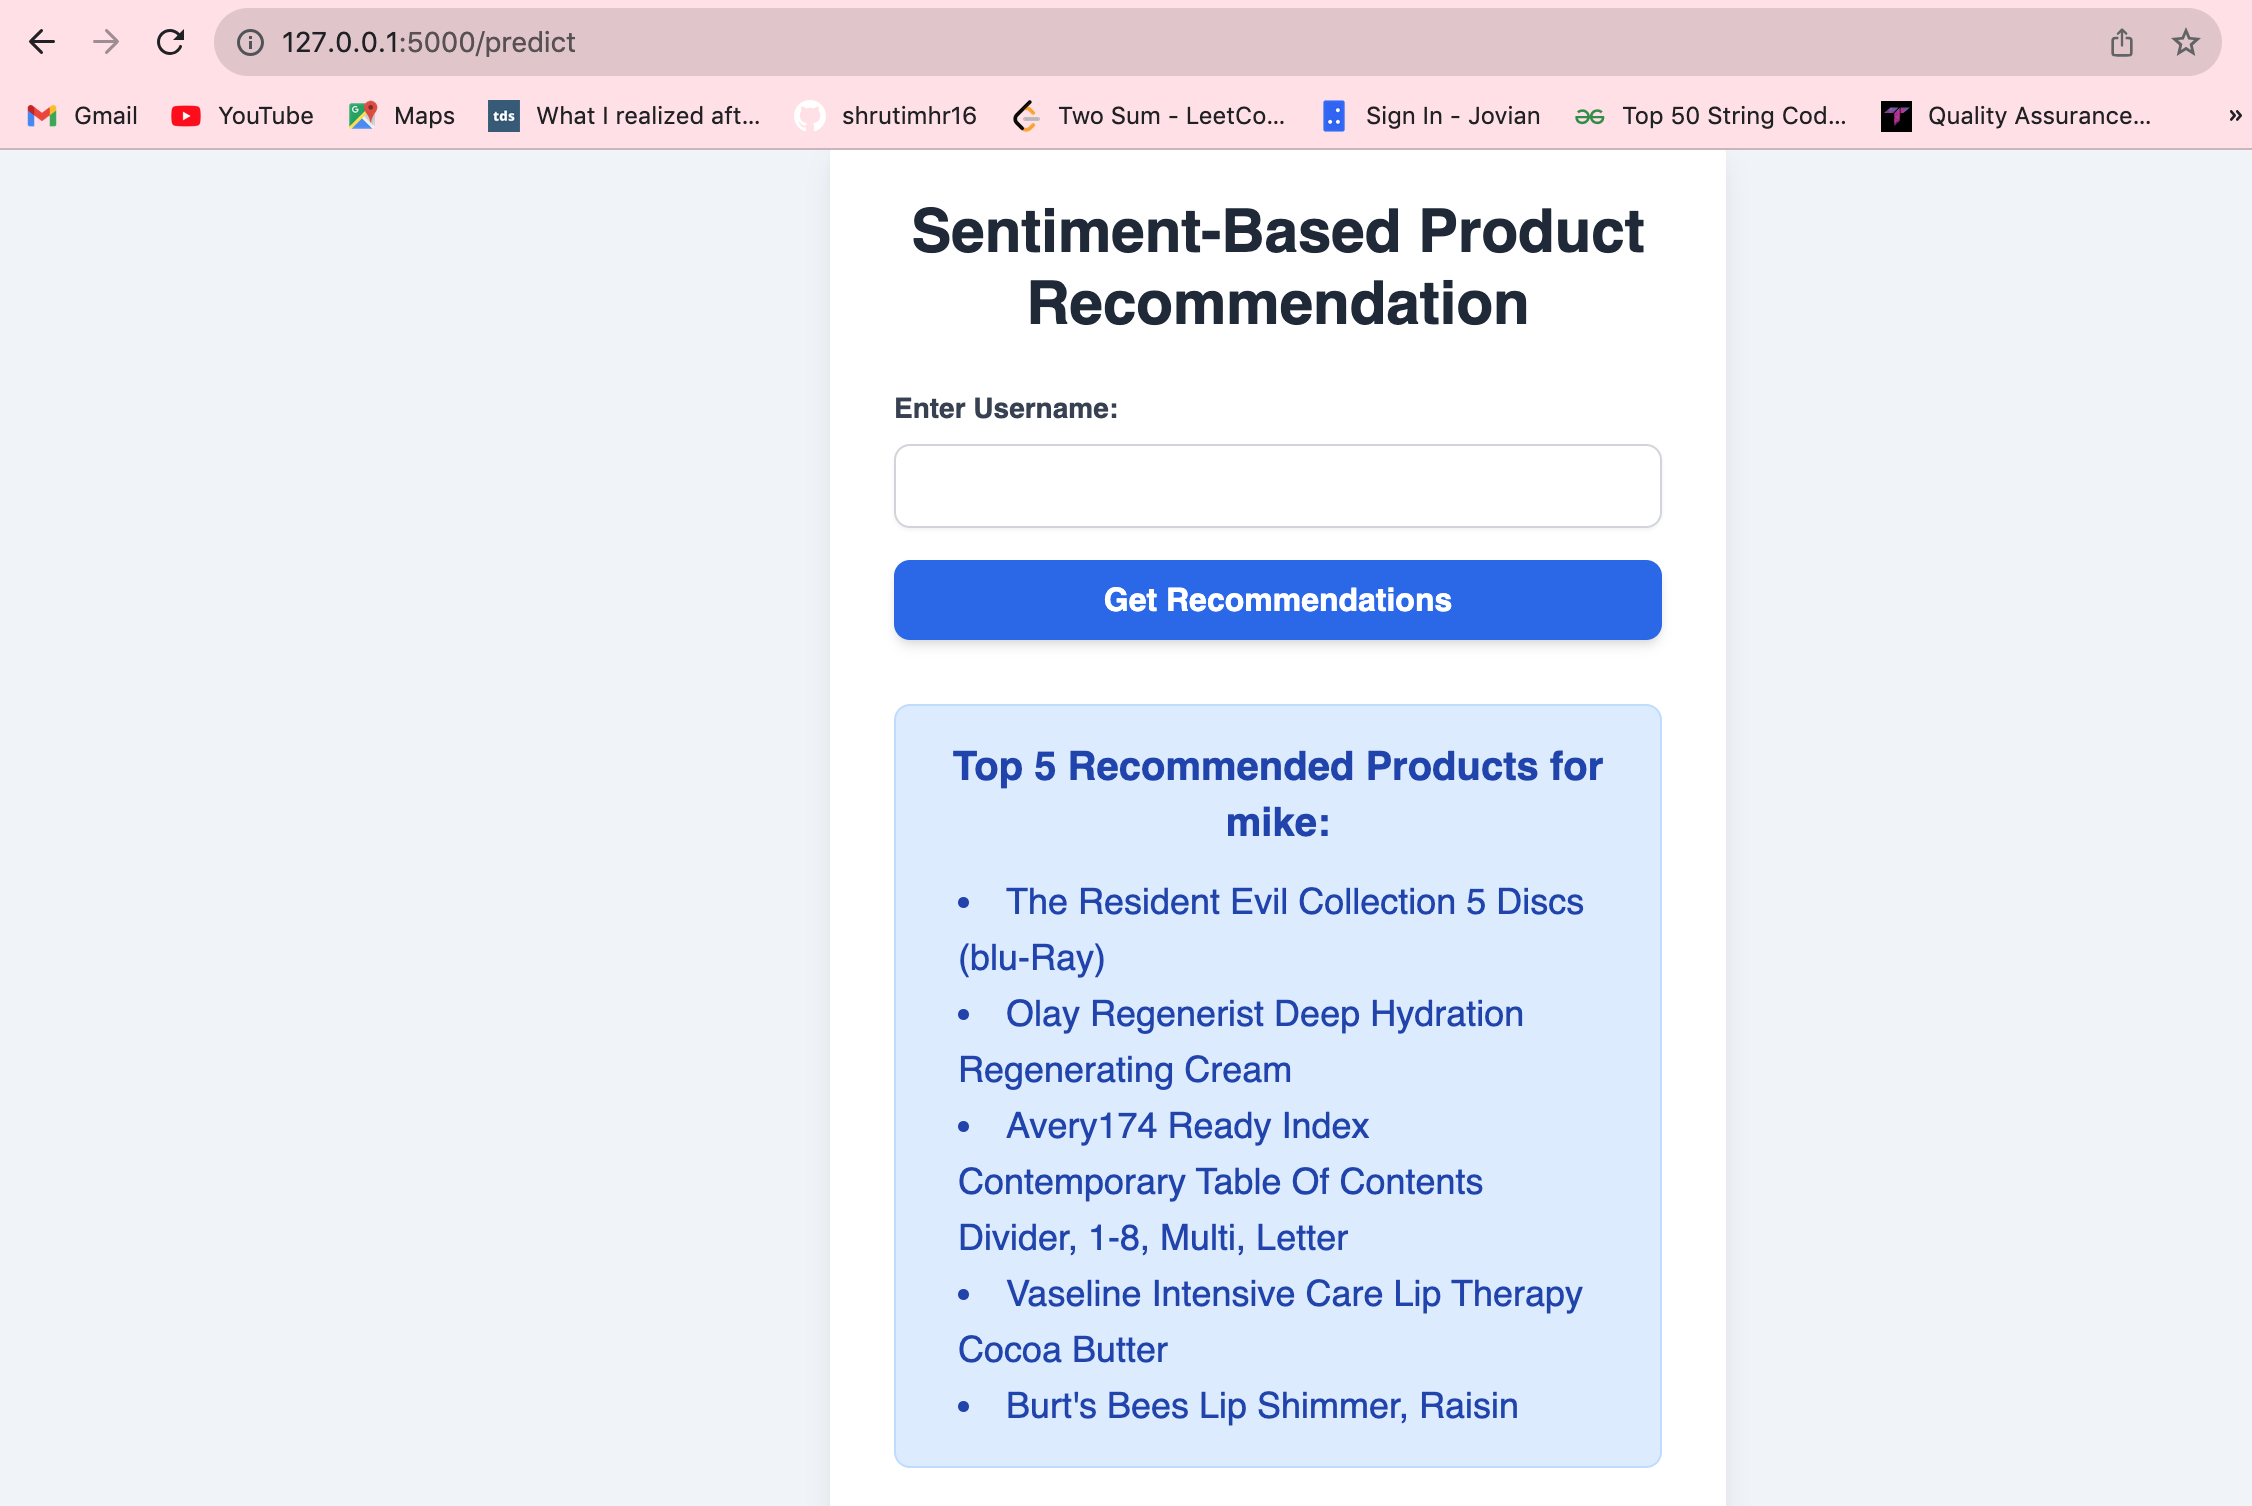

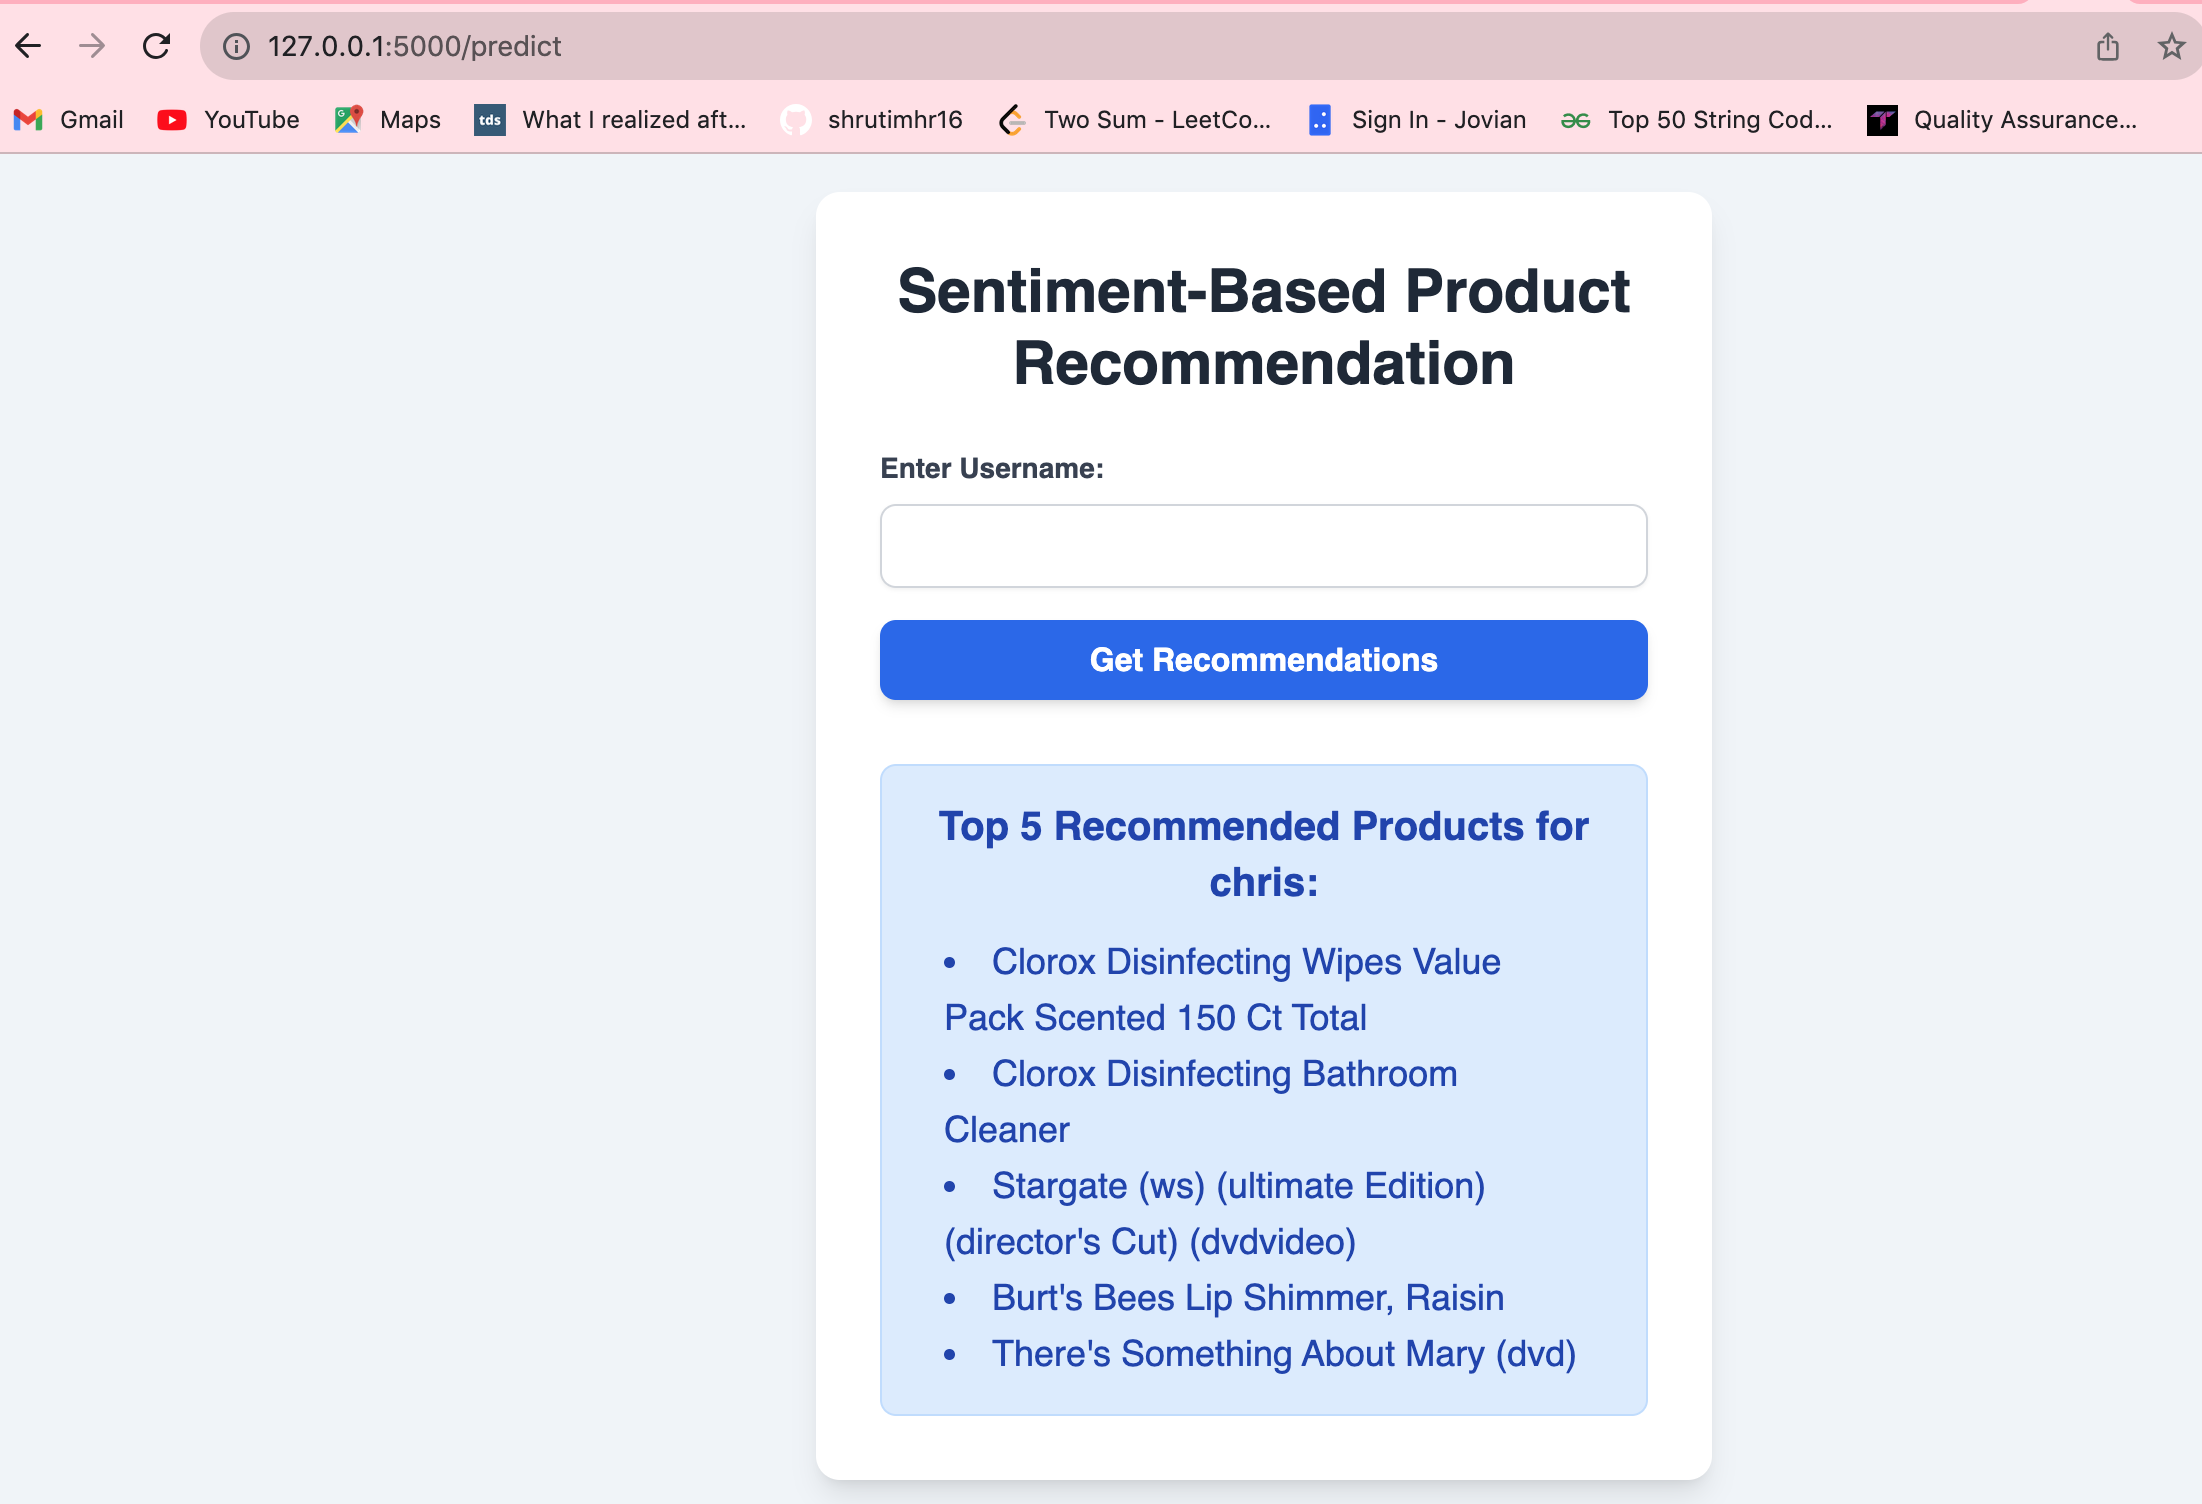

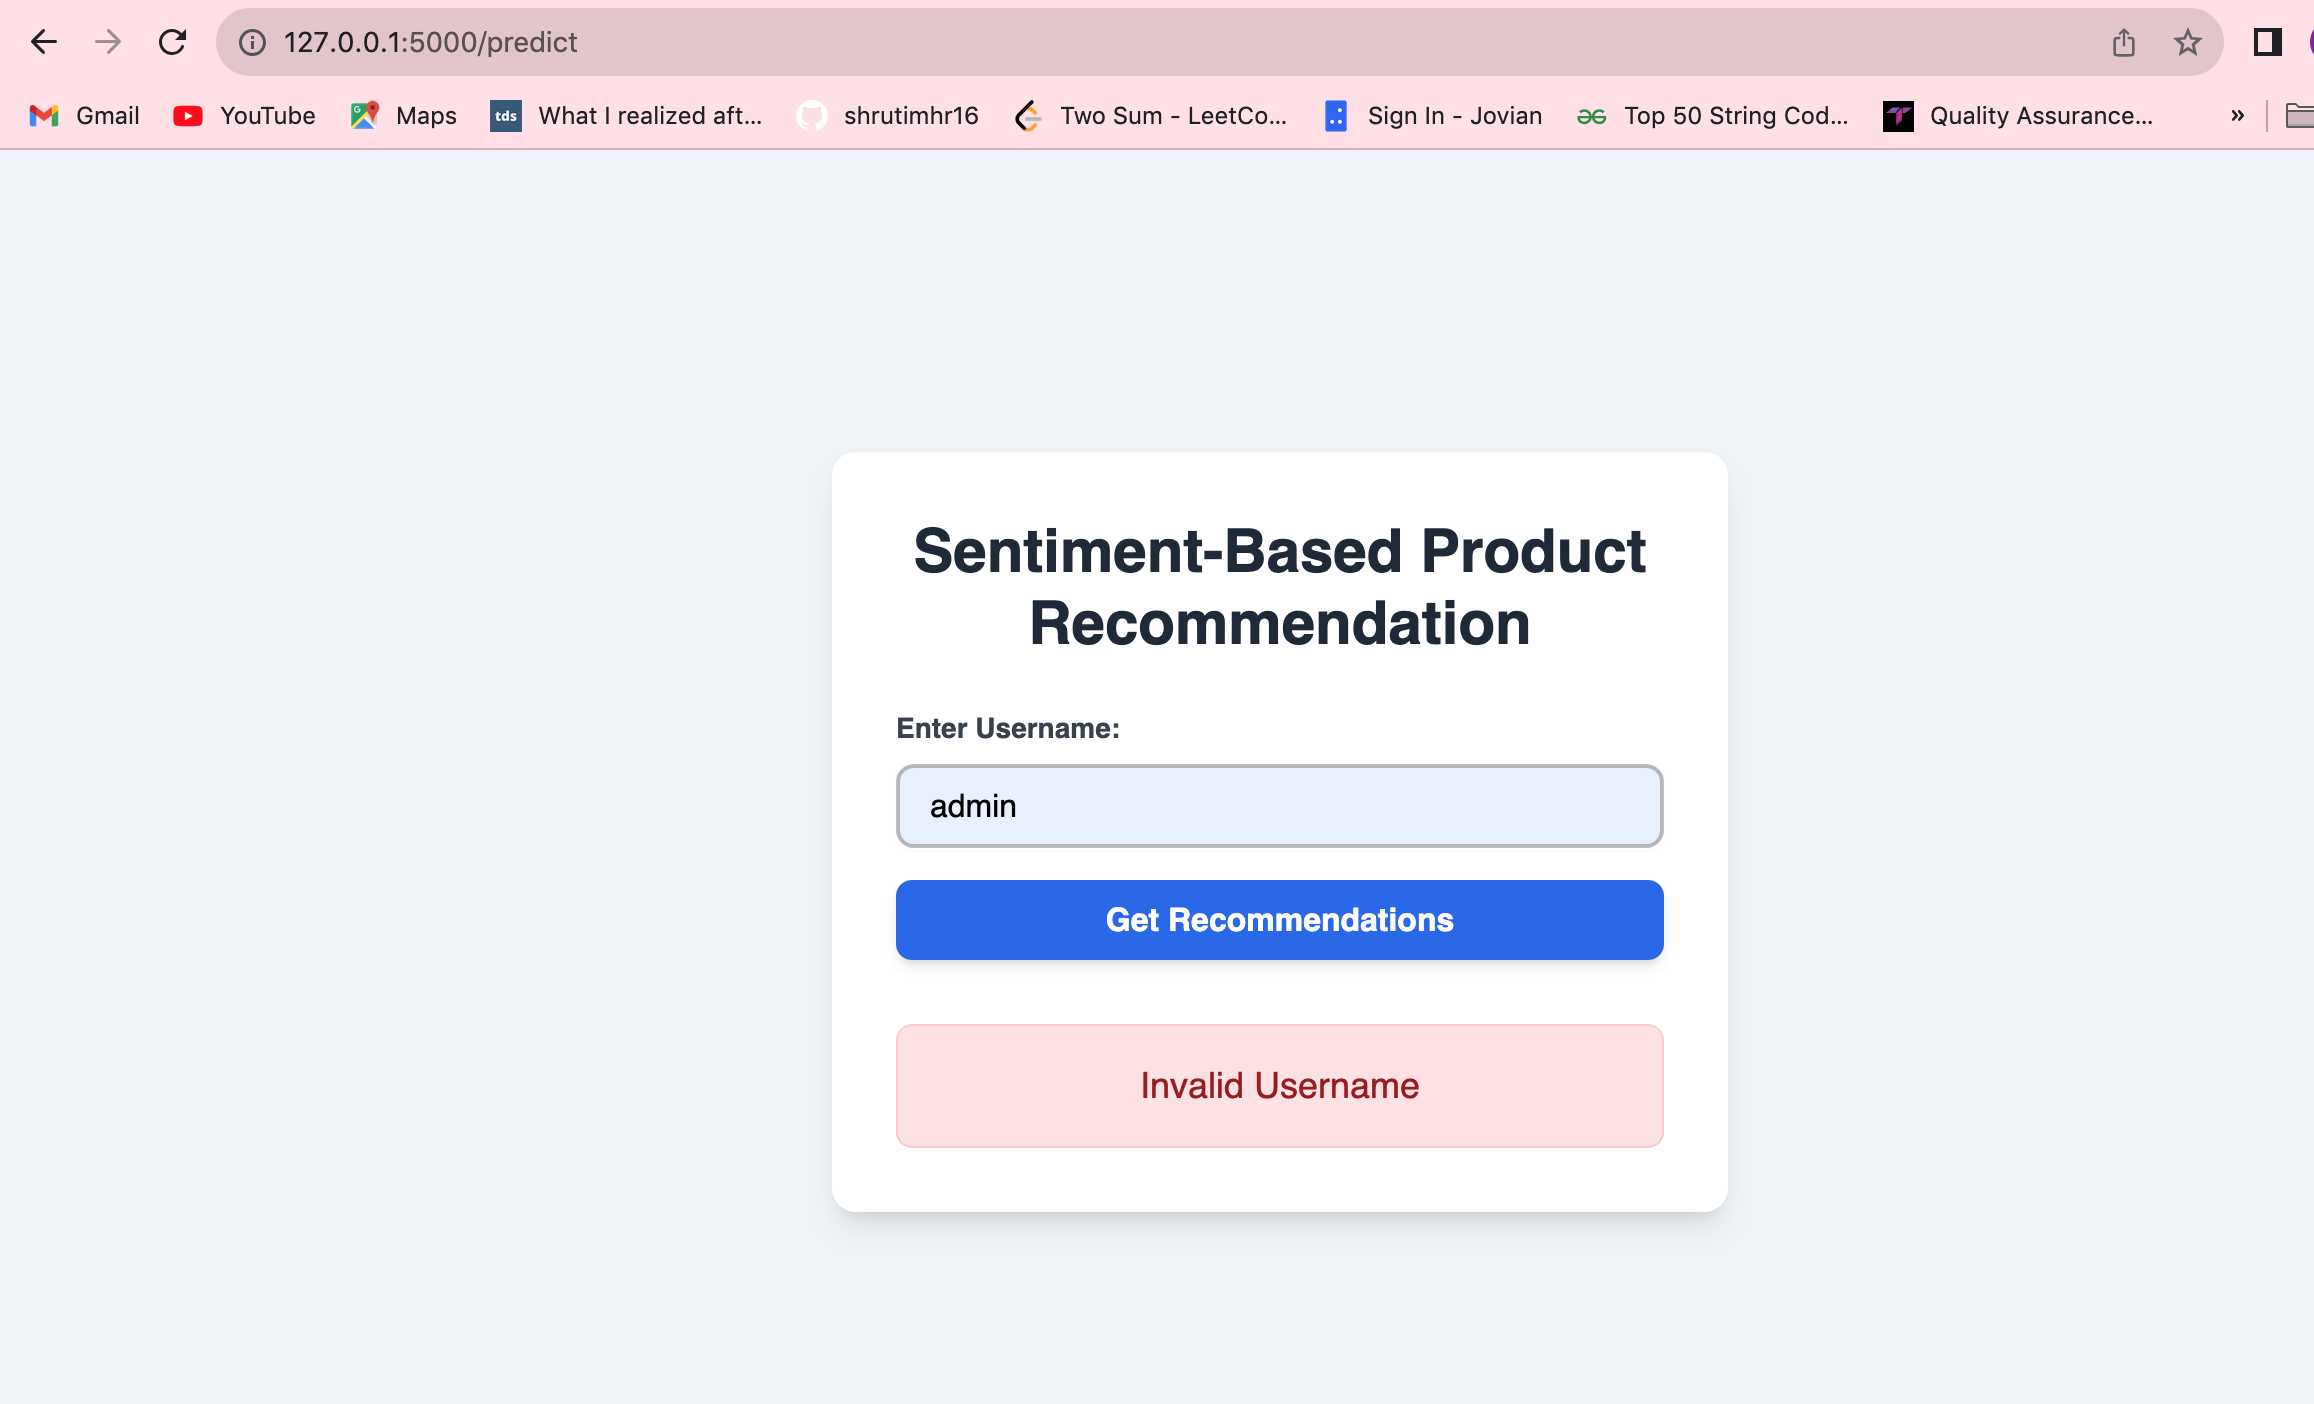